```
CRUZ, AIRON JOHN R.
IMAGPRO-S12
MACHINE PROJECT 3: COLOR TRANSFORMATIONS
```

# Information Extraction

**Importing all Required Libraries and other Definition of Image Dataset Paths**

In [65]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_dataset = []
filenames = ['0001', '0002','0003', '0007', '0008', '0009',
             '0010', '0011', '0020', '0030']
DIRECTORY_IMG = '/content/drive/My Drive/IMAGPRO_MP3/orig_images'
RESIZED_OUTPUT_DIRECTORY = '/content/drive/My Drive/IMAGPRO_MP3/resized'
AUGMENTED_OUTPUT_DIRECTORY = '/content/drive/My Drive/IMAGPRO_MP3/augmented'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reshape the images to (100,100,3)

In [66]:
for file in filenames:
  # Read all images in the dataset included in the filenames list
  orig_image = cv2.imread(f'{DIRECTORY_IMG}/{file}.jpg')
  # # Covert default color to RGB
  orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
  print(f"Image {file} size: {orig_image.shape}")
  # Resize all six images to 32 by 32
  resized_image = cv2.resize(orig_image, (100,100))
  # Store them to image_dataset list
  image_dataset.append(resized_image)

Image 0001 size: (2648, 2045, 3)
Image 0002 size: (1892, 1892, 3)
Image 0003 size: (2317, 2317, 3)
Image 0007 size: (3024, 4032, 3)
Image 0008 size: (2679, 2679, 3)
Image 0009 size: (2113, 2113, 3)
Image 0010 size: (1414, 1414, 3)
Image 0011 size: (4032, 3024, 3)
Image 0020 size: (2559, 2559, 3)
Image 0030 size: (4032, 3024, 3)


**Checking of resized images' shapes:**

In [67]:
for image in image_dataset:
  print(f"Image size: {image.shape}")

Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)
Image size: (100, 100, 3)


Save the transformed images as JPEG files in a separate directory.

In [68]:
counter = 0
for file in filenames:
  # Save the transformed image as JPEG in the output directory
  output_filename = os.path.join(RESIZED_OUTPUT_DIRECTORY, f'{file}_resized.jpg')
  cv2.imwrite(output_filename, cv2.cvtColor(image_dataset[counter], cv2.COLOR_RGB2BGR))
  counter += 1
# image_tensor = np.array(image_dataset)
# # Filename of the npy file to be stored within the same gdrive as the dataset
# TENSOR_FILENAME = 'tensor_image.npy'
# # Use np function to save the .npy file
# np.save(f'{RESIZED_OUTPUT_DIRECTORY}/{TENSOR_FILENAME}', image_tensor)

Create a histogram for the following channels:
* Reds
* Greens
* Blues
* Hues
* Saturations
* Intensities

First, below are the declared functions to calculate and plot all the required channel histograms of each image dataset.

In [69]:
# This calculates all 6 histograms of an image

def calculate_histograms(image):
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate histograms
    red_hist, _ = np.histogram(image[:,:,0].ravel(), bins=256, range=[0, 256])
    green_hist, _ = np.histogram(image[:,:,1].ravel(), bins=256, range=[0, 256])
    blue_hist, _ = np.histogram(image[:,:,2].ravel(), bins=256, range=[0, 256])
    hue_hist, _ = np.histogram(image_hsv[:,:,0].ravel(), bins=180, range=[0, 180])
    saturation_hist, _ = np.histogram(image_hsv[:,:,1].ravel(), bins=256, range=[0, 256])
    intensity_hist, _ = np.histogram(image_hsv[:,:,2].ravel(), bins=256, range=[0, 256])

    return red_hist, green_hist, blue_hist, hue_hist, saturation_hist, intensity_hist


# This function plots all the histograms for each resized image dataset
def plot_histograms(hist_data_list, image_filename):
    red_hist, green_hist, blue_hist, hue_hist, saturation_hist, intensity_hist = hist_data_list

    # Plot histograms
    plt.figure(figsize=(16, 10))

    plt.subplot(2, 3, 1)
    plt.fill_between(np.arange(256), red_hist, color='red', alpha=0.6)
    plt.title(f'{image_filename}-Red Histogram')

    plt.subplot(2, 3, 2)
    plt.fill_between(np.arange(256), green_hist, color='green', alpha=0.6)
    plt.title(f'{image_filename}-Green Histogram')

    plt.subplot(2, 3, 3)
    plt.fill_between(np.arange(256), blue_hist, color='blue', alpha=0.6)
    plt.title(f'{image_filename}-Blue Histogram')

    plt.subplot(2, 3, 4)
    plt.fill_between(np.arange(180), hue_hist, color='orange', alpha=0.6)
    plt.title(f'{image_filename}-Hue Histogram')

    plt.subplot(2, 3, 5)
    plt.fill_between(np.arange(256), saturation_hist, color='purple', alpha=0.6)
    plt.title(f'{image_filename}-Saturation Histogram')

    plt.subplot(2, 3, 6)
    plt.fill_between(np.arange(256), intensity_hist, color='gray', alpha=0.6)
    plt.title(f'{image_filename}-Intensitie Histogram')

    plt.tight_layout()
    plt.show()


The histograms for each channel of the resized images from the dataset are computed below. Additionally, plots of these histograms are collated and displayed for visualization purposes.

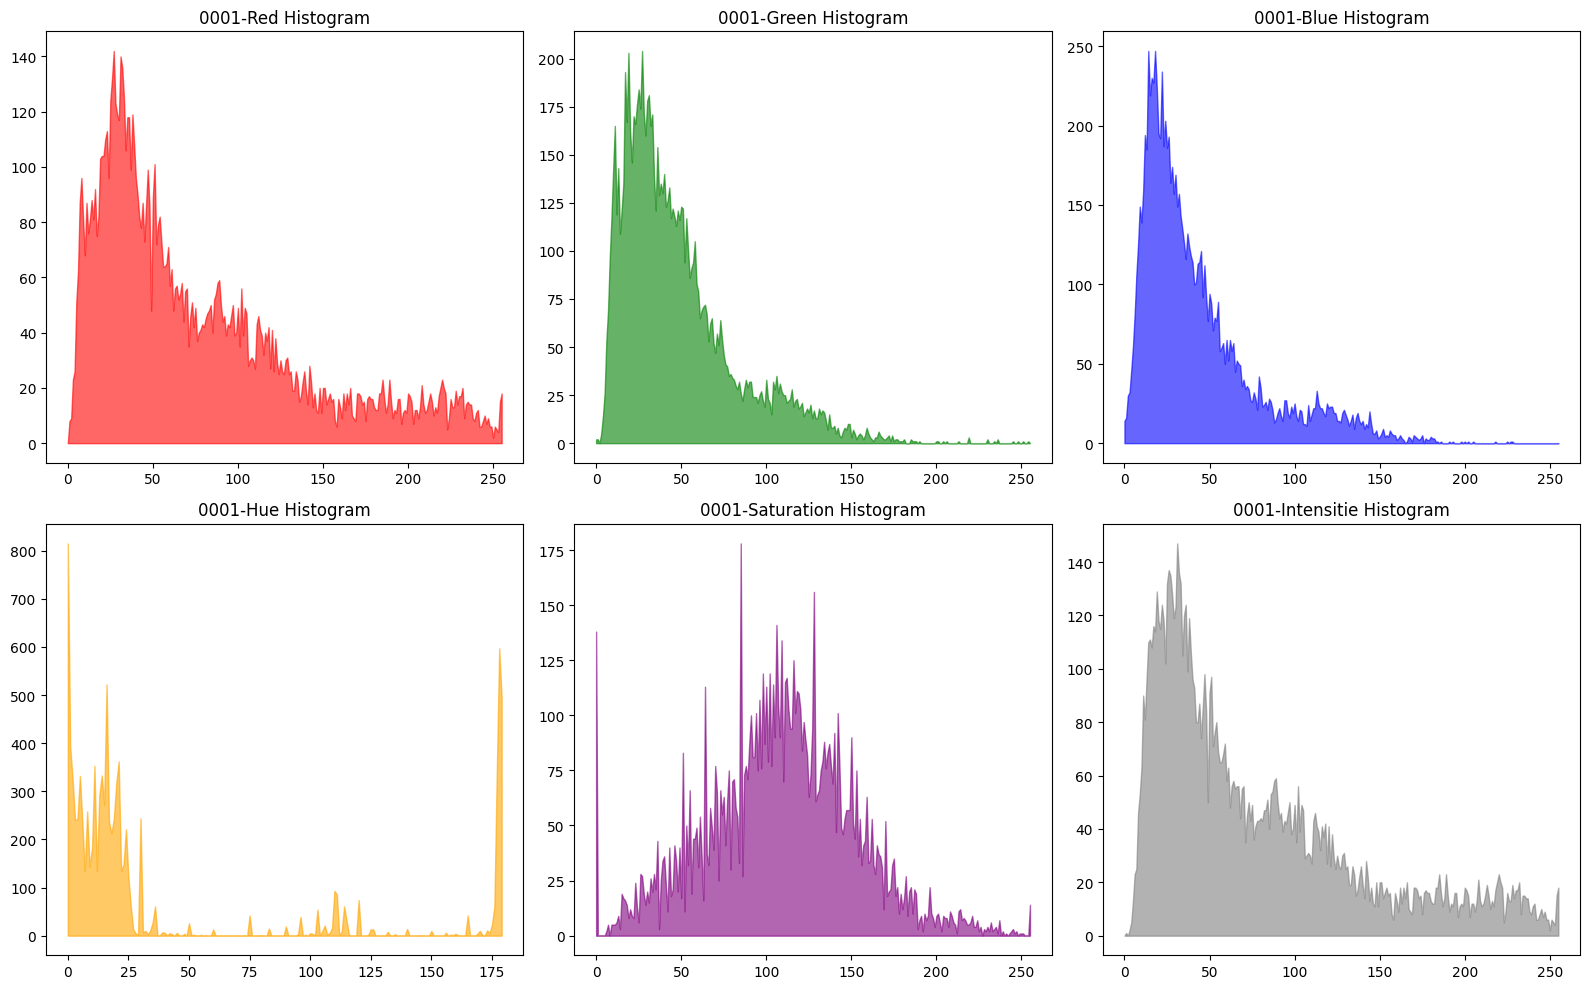

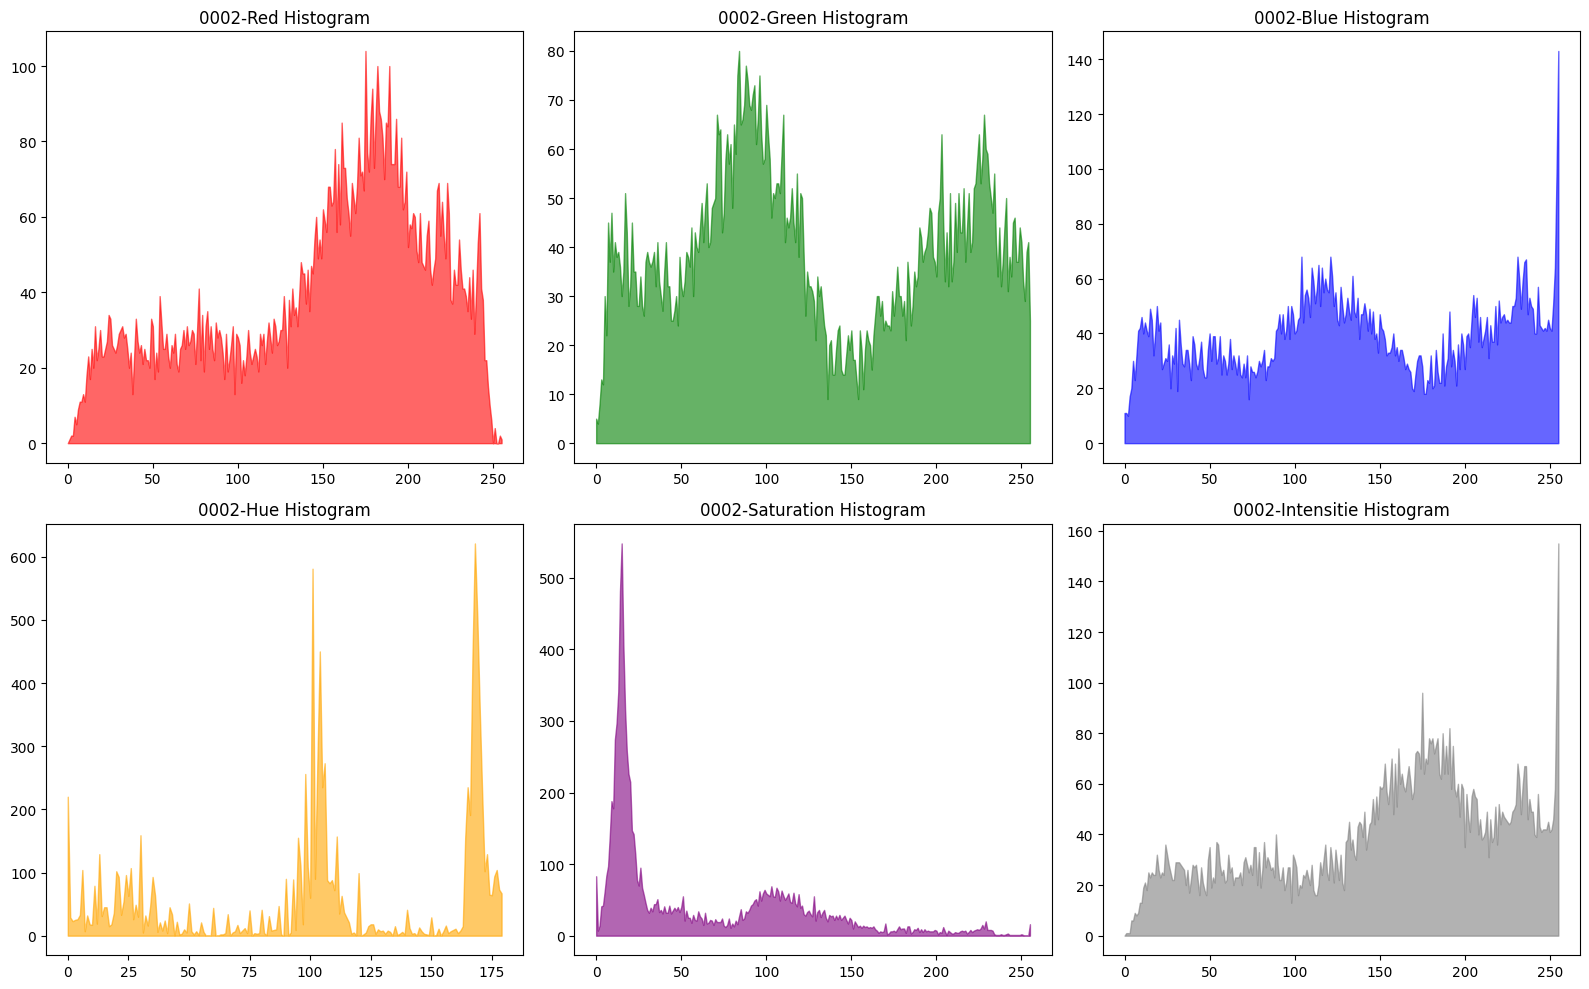

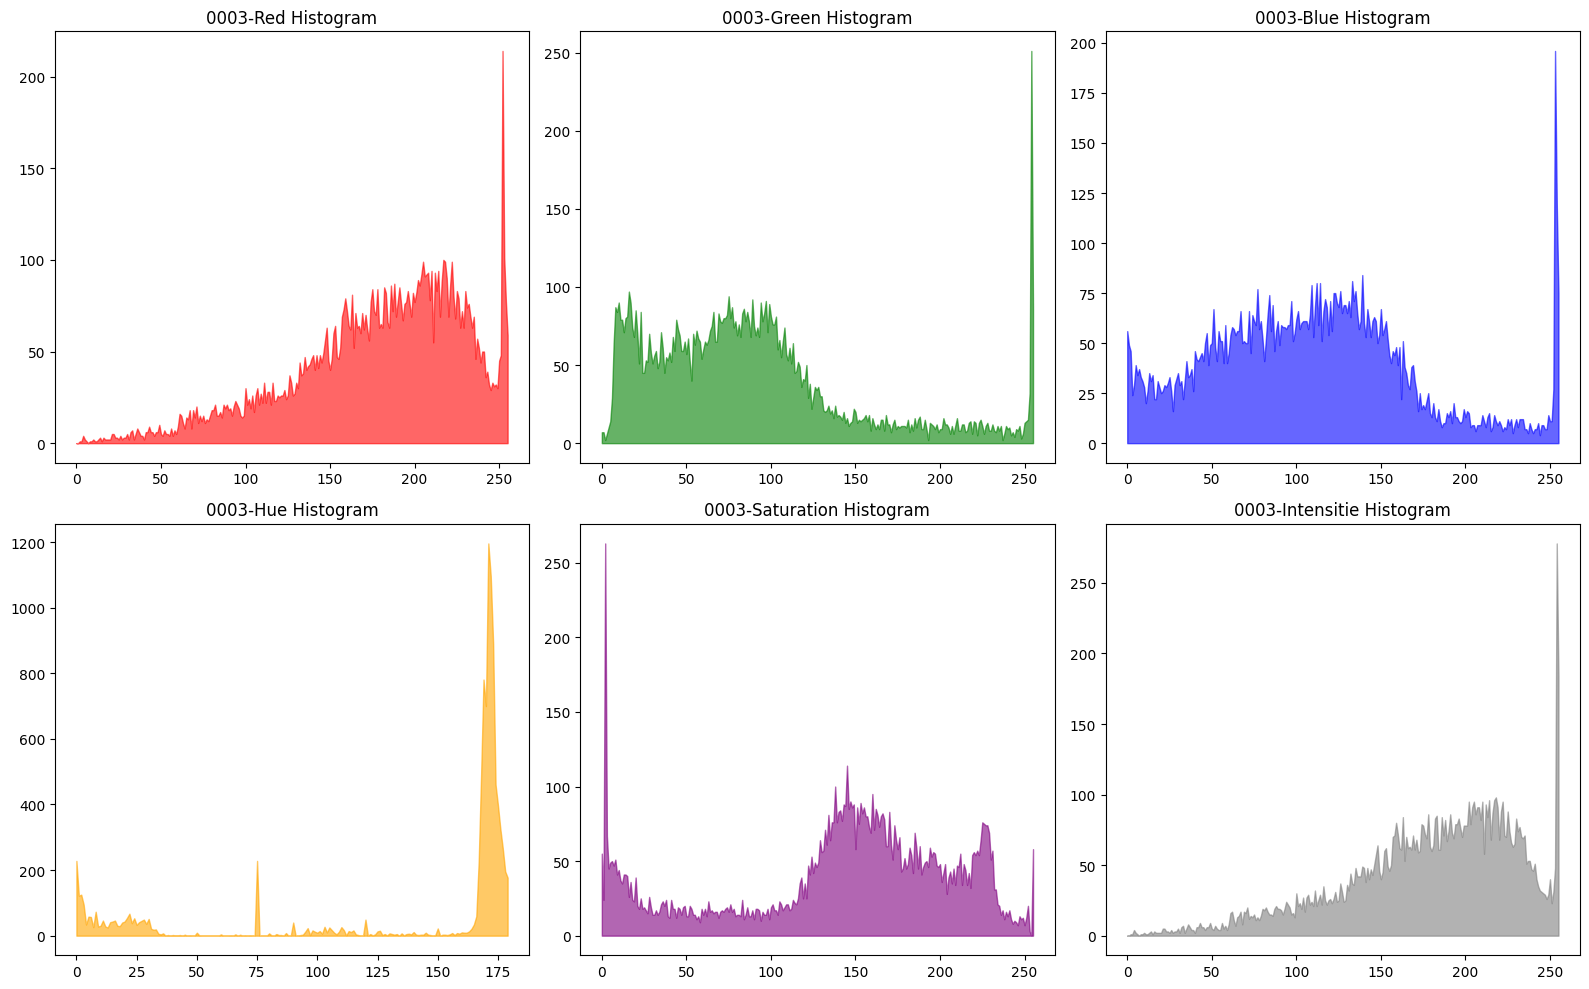

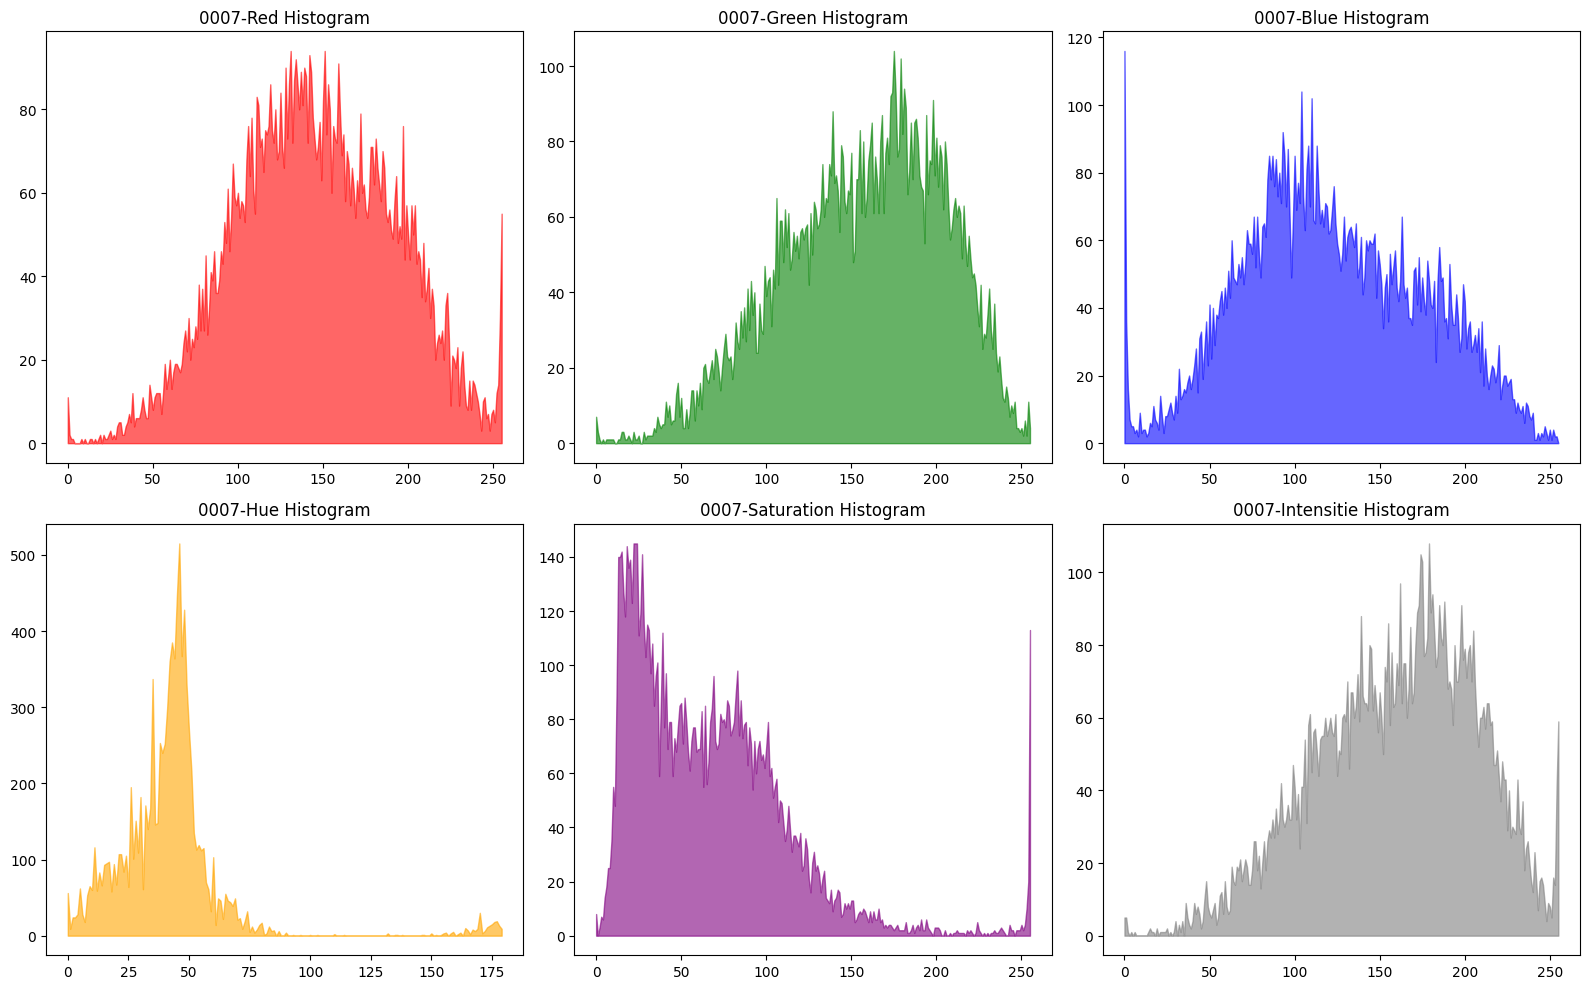

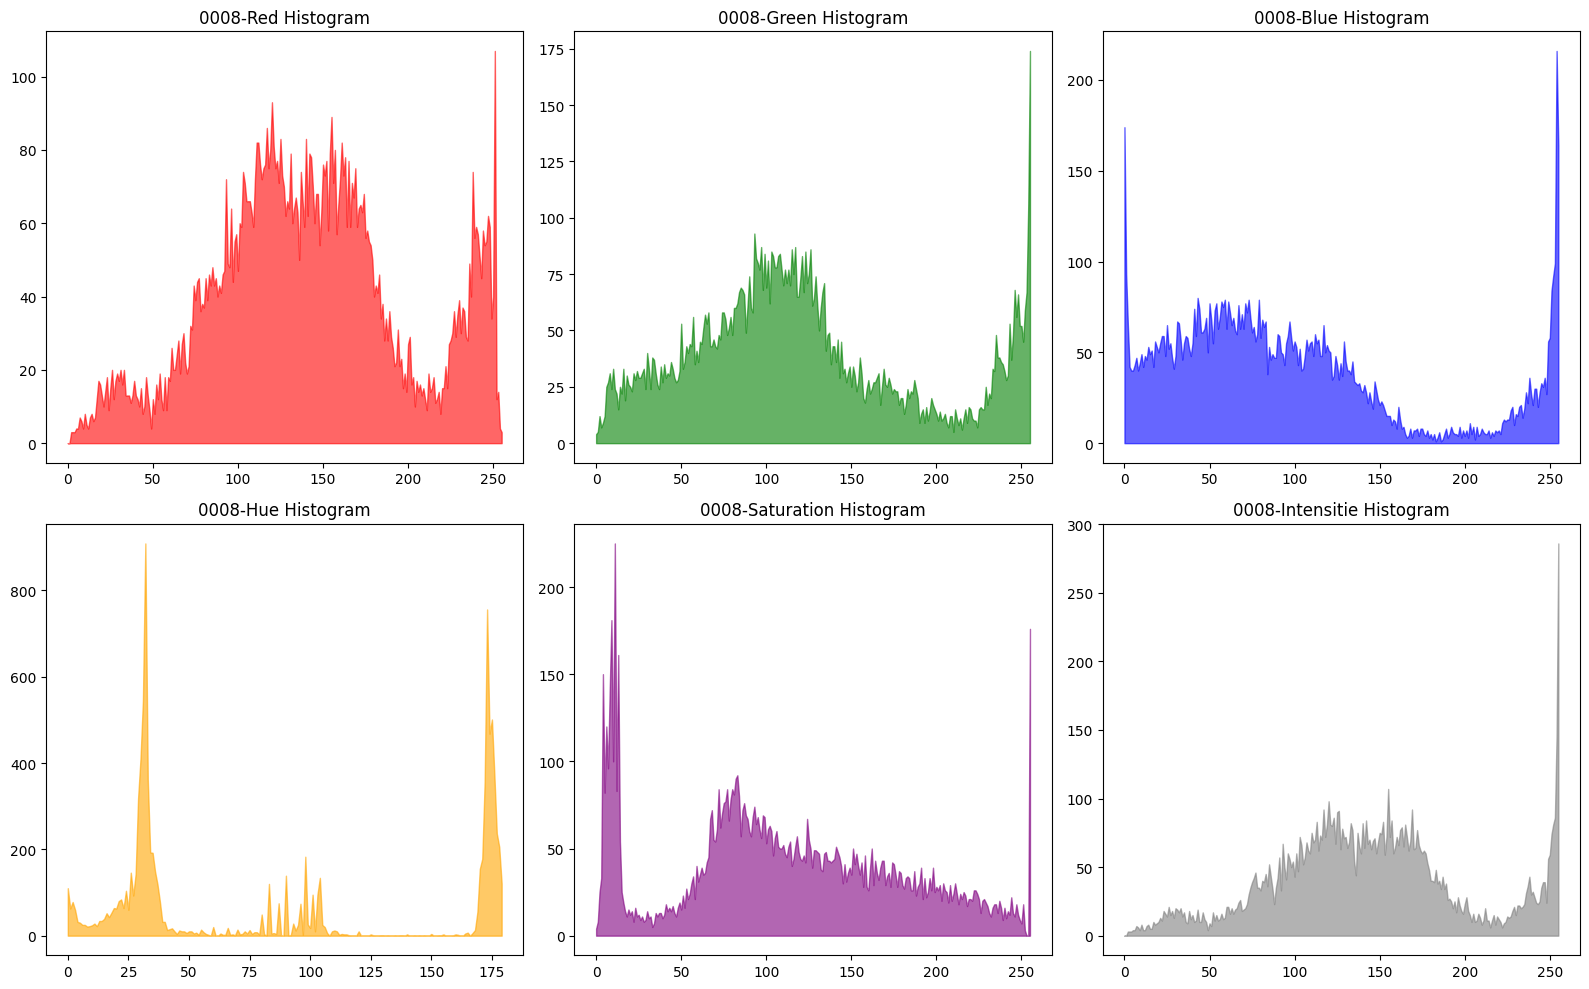

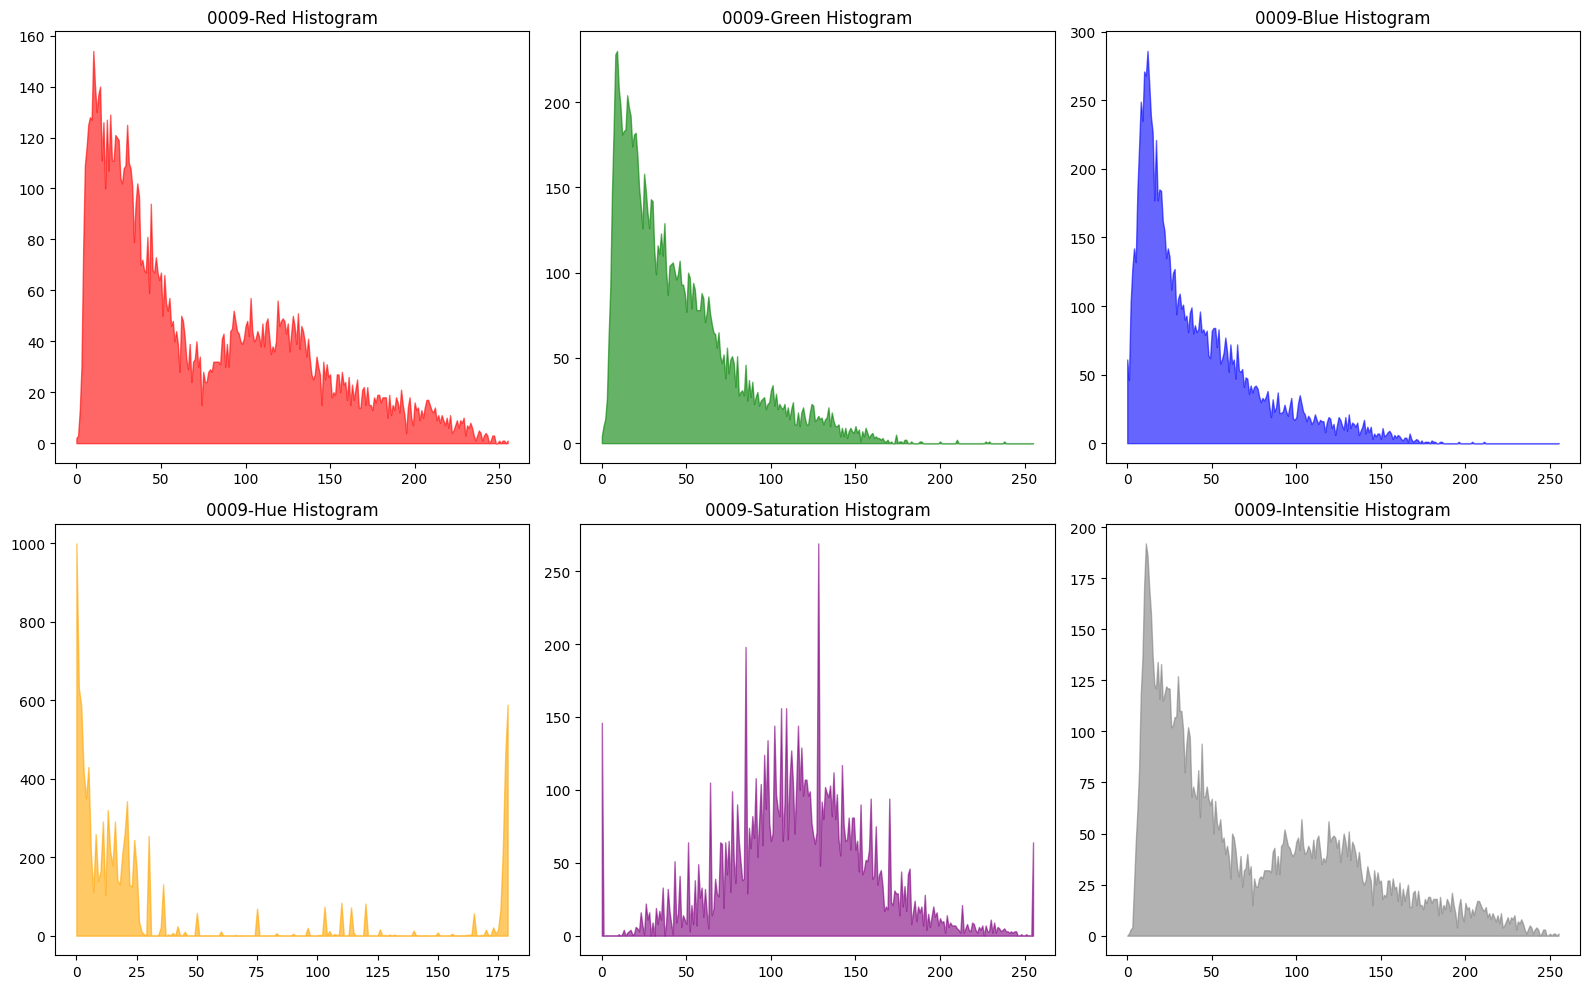

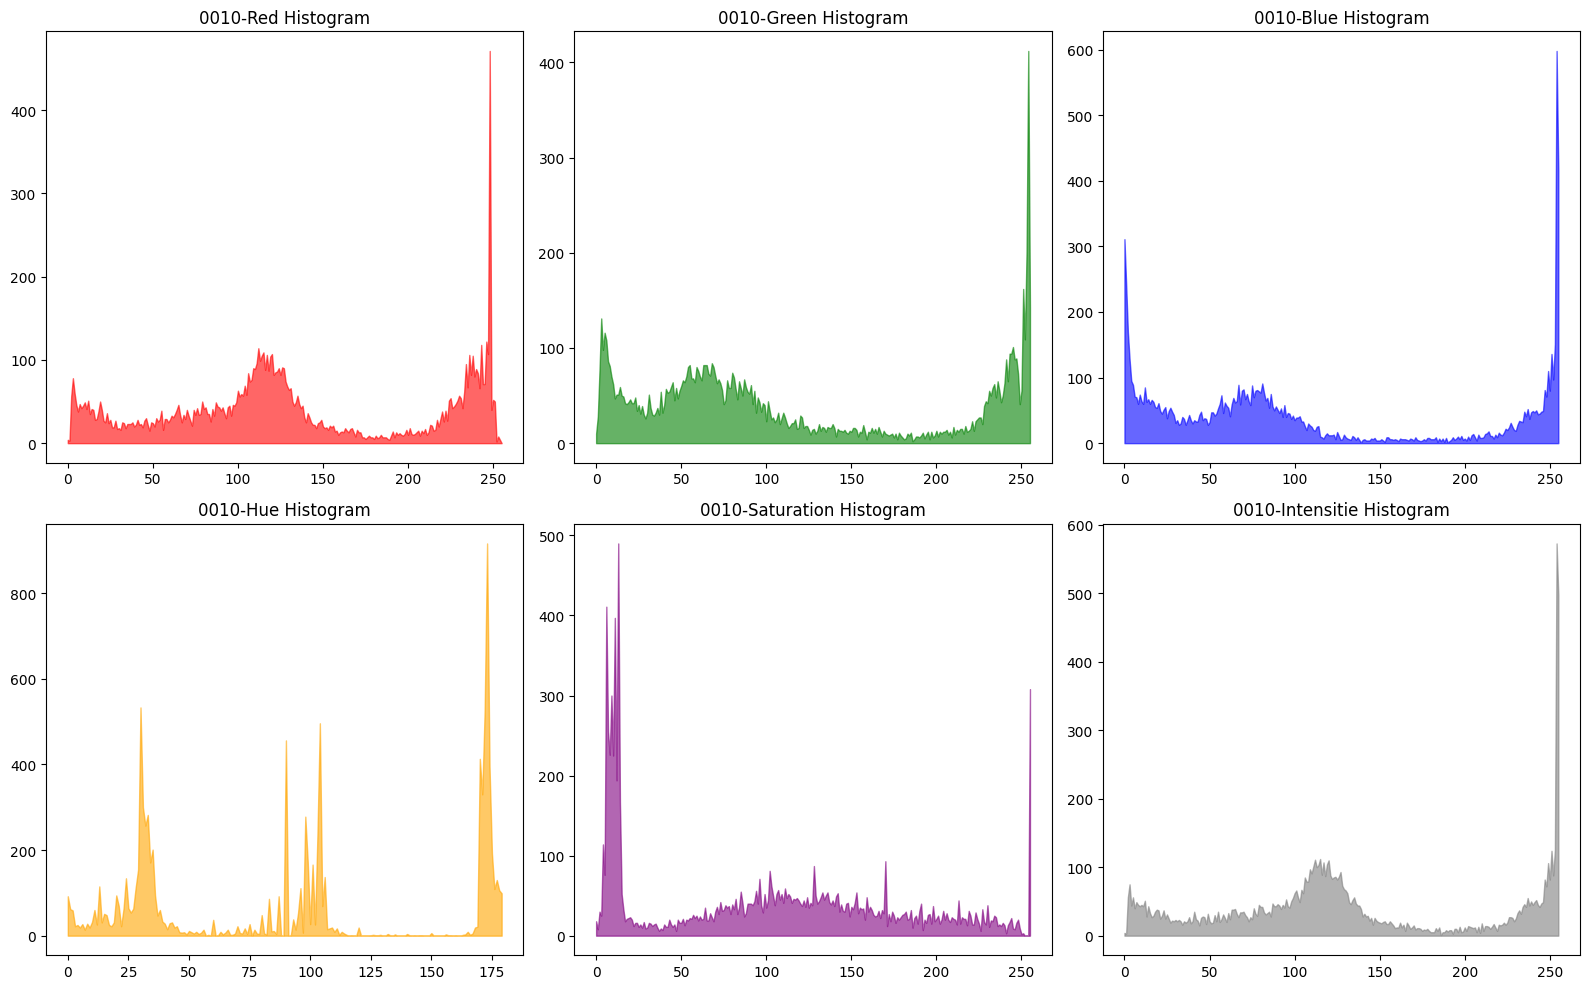

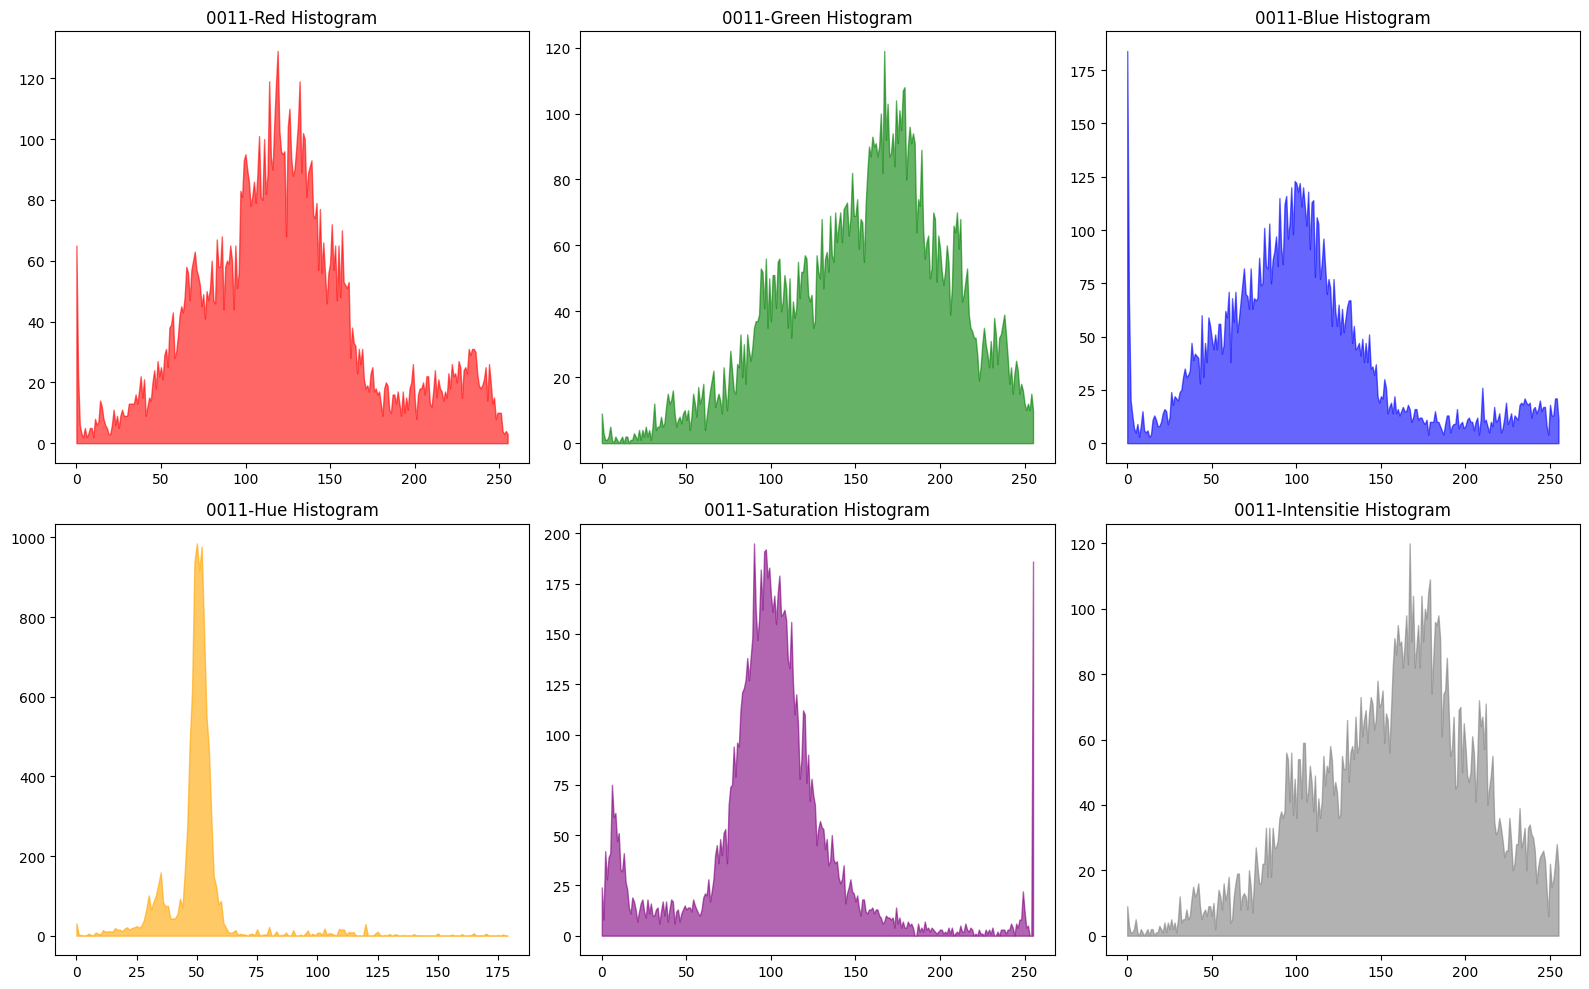

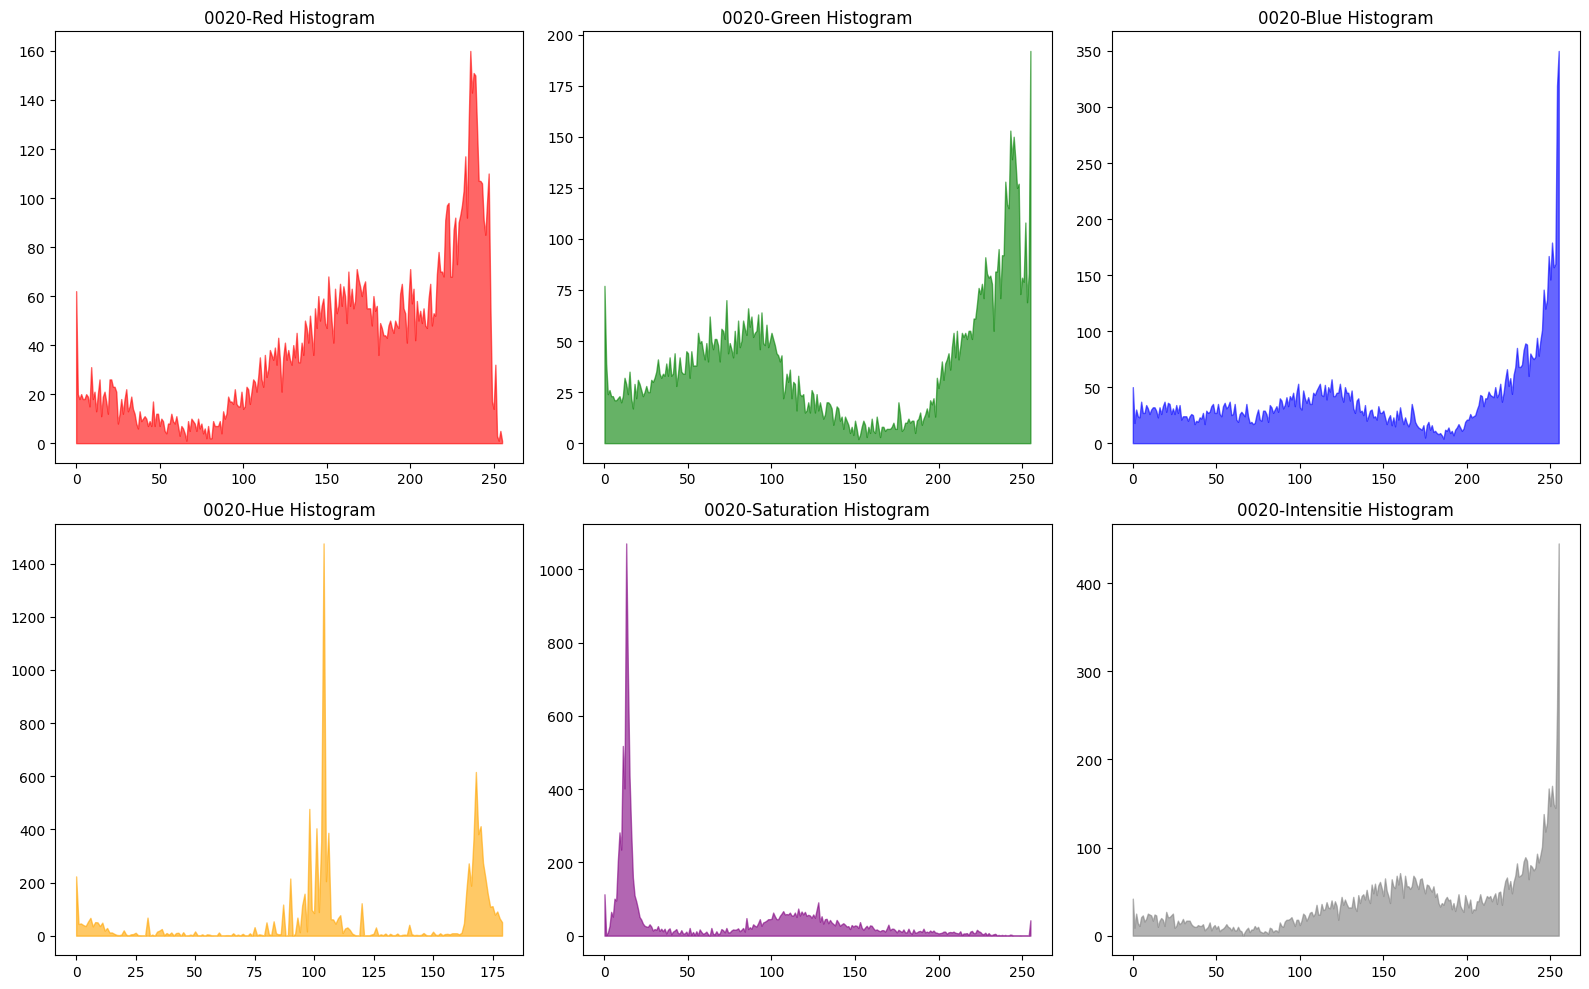

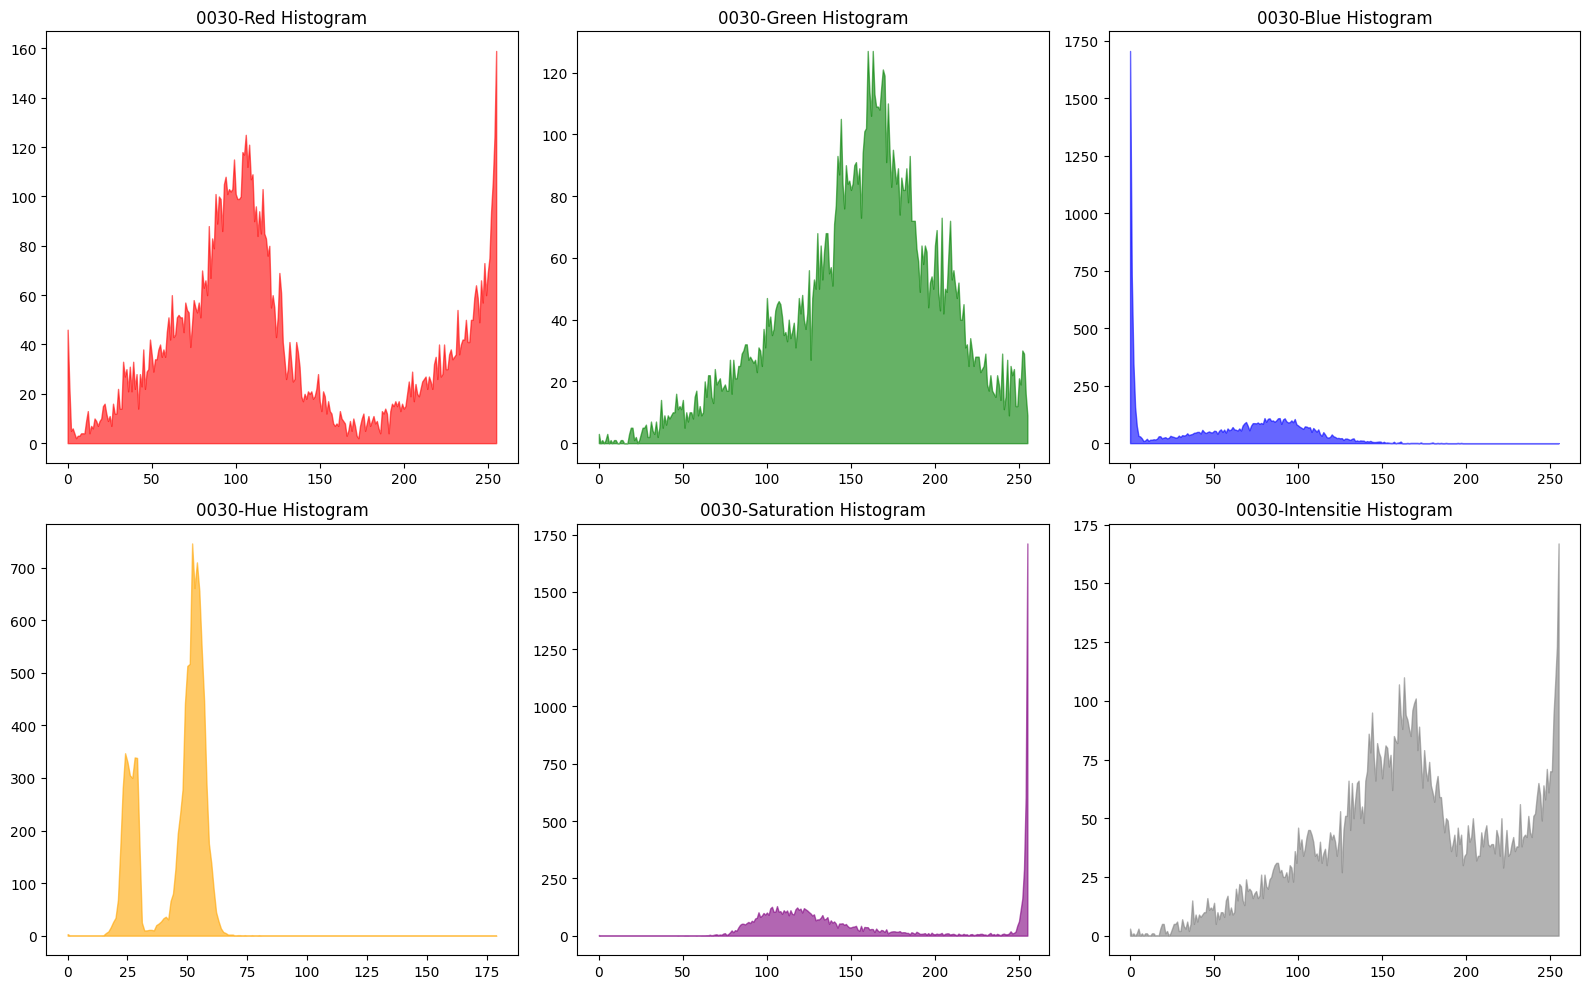

In [70]:
# Initialize cumulative histogram data
cumulative_red_hist = np.zeros(256)
cumulative_green_hist = np.zeros(256)
cumulative_blue_hist = np.zeros(256)
cumulative_hue_hist = np.zeros(180)
cumulative_saturation_hist = np.zeros(256)
cumulative_intensity_hist = np.zeros(256)

counter = 0
histogram_data_list = []
for image in image_dataset:
    # Call the function for calculating the channel histograms
    histogram_data = calculate_histograms(image)
    histogram_data_list.append(histogram_data)
    # Plot histograms for multiple images
    plot_histograms(histogram_data, filenames[counter])
    counter += 1

    # Accumulate histogram data
    cumulative_red_hist += histogram_data[0]
    cumulative_green_hist += histogram_data[1]
    cumulative_blue_hist += histogram_data[2]
    cumulative_hue_hist += histogram_data[3]
    cumulative_saturation_hist += histogram_data[4]
    cumulative_intensity_hist += histogram_data[5]

**Sanity Check:** Below are the resized images from the dataset for reference, corresponding to the calculated channel histogram outputs displayed above.

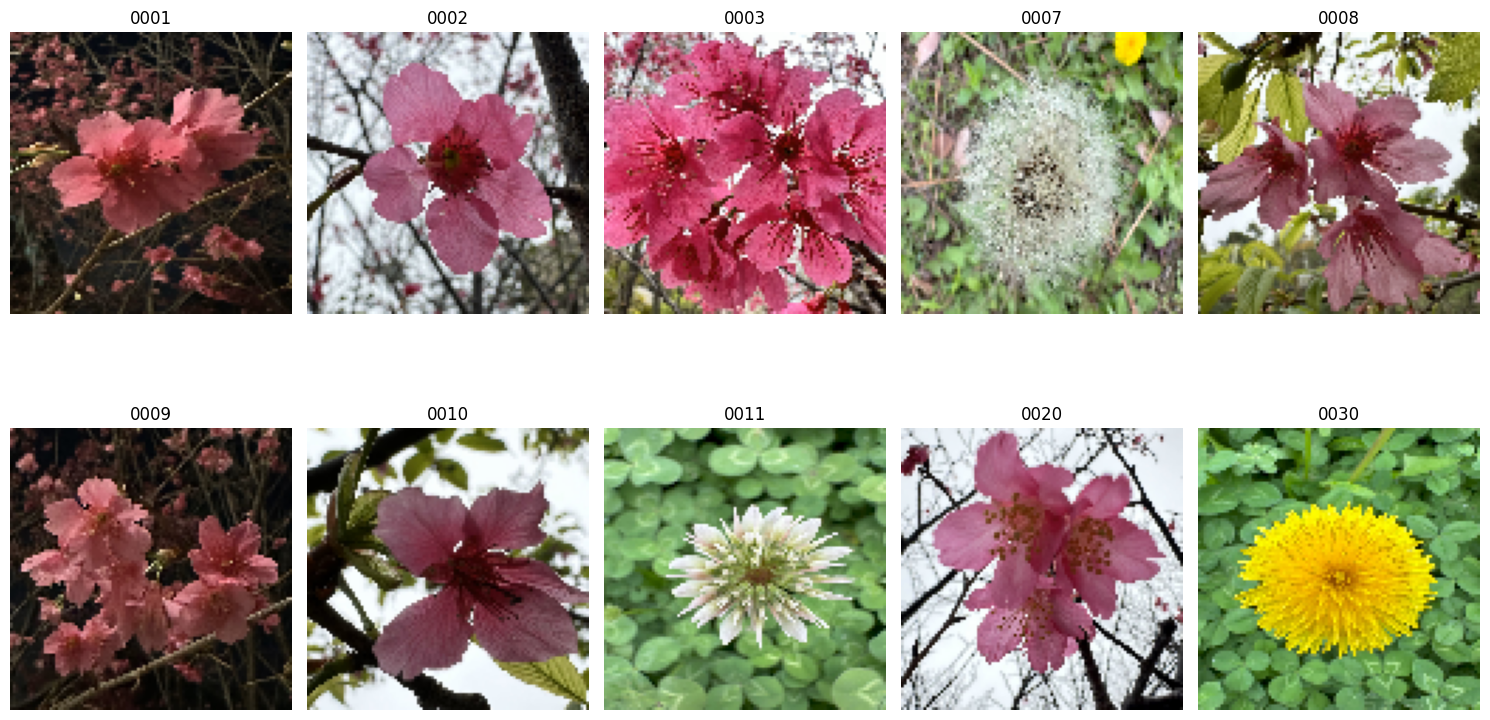

In [71]:
rows = 2
cols = 5
counter = 0
plt.figure(figsize=(15, 9))

for image in image_dataset:
    plt.subplot(rows, cols, counter+1)
    plt.imshow(image)
    plt.title(filenames[counter])
    plt.axis('off')
    counter += 1
plt.tight_layout()
plt.show()

Another helpful feature would be to display the cumulative histogram for both the RGB and HSV channels. In this case, we can observe the characteristics of the image dataset through these visualizations.

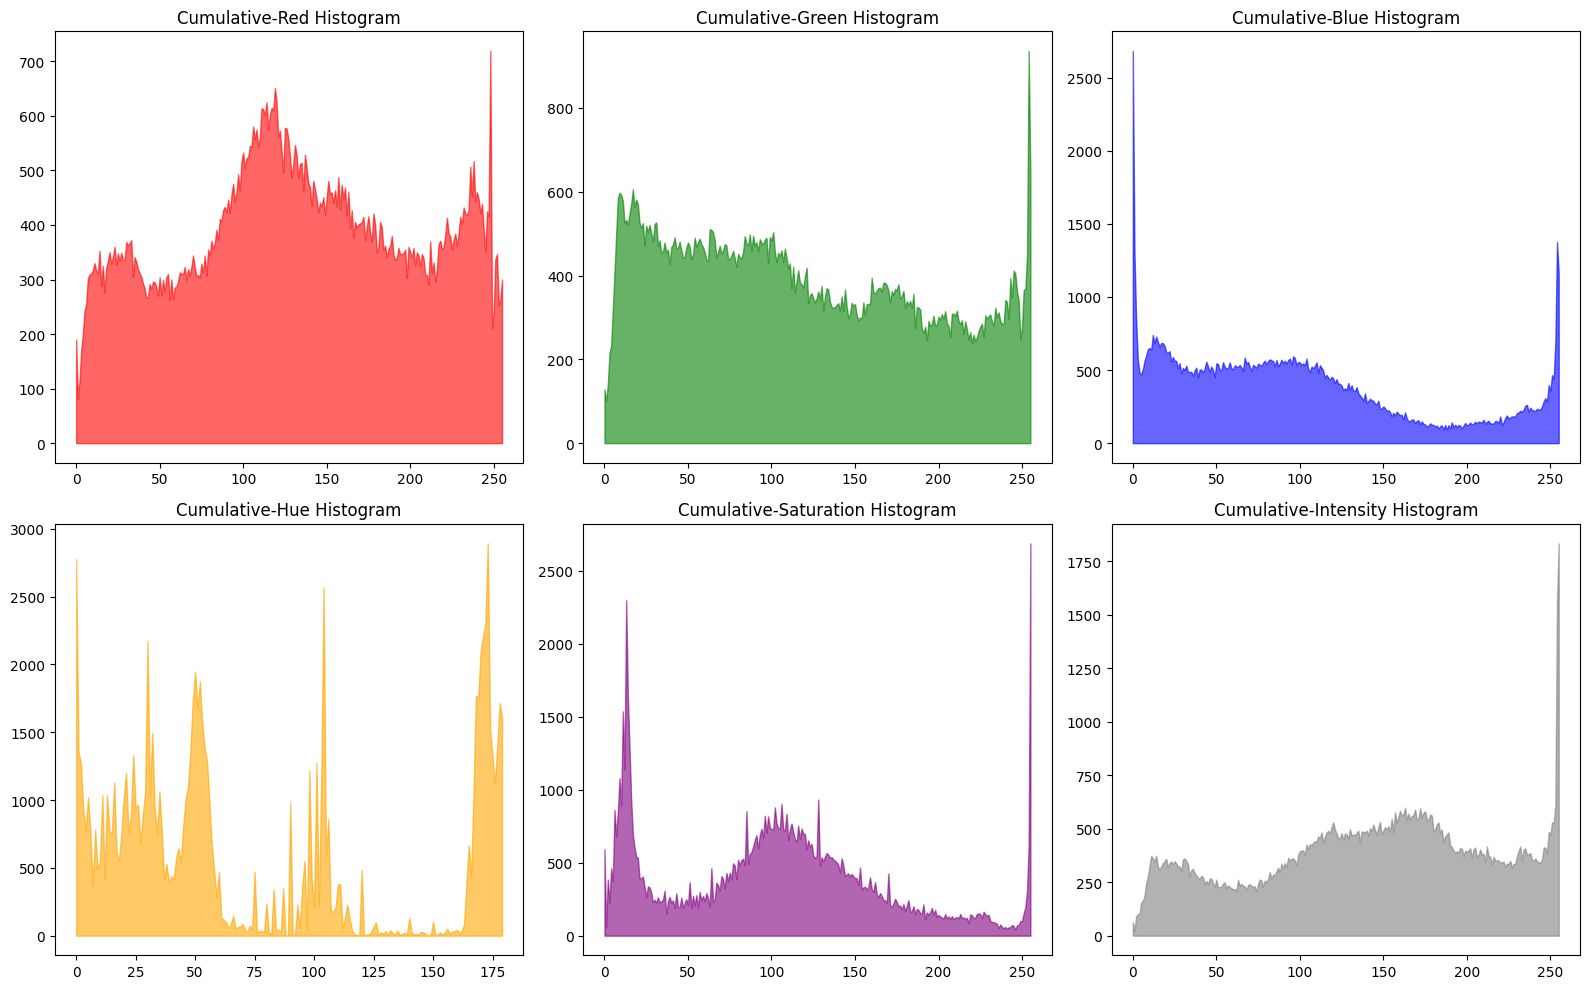

In [72]:
# Plot cumulative histograms
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.fill_between(np.arange(256), cumulative_red_hist, color='red', alpha=0.6)
plt.title('Cumulative-Red Histogram')

plt.subplot(2, 3, 2)
plt.fill_between(np.arange(256), cumulative_green_hist, color='green', alpha=0.6)
plt.title('Cumulative-Green Histogram')

plt.subplot(2, 3, 3)
plt.fill_between(np.arange(256), cumulative_blue_hist, color='blue', alpha=0.6)
plt.title('Cumulative-Blue Histogram')

plt.subplot(2, 3, 4)
plt.fill_between(np.arange(180), cumulative_hue_hist, color='orange', alpha=0.6)
plt.title('Cumulative-Hue Histogram')

plt.subplot(2, 3, 5)
plt.fill_between(np.arange(256), cumulative_saturation_hist, color='purple', alpha=0.6)
plt.title('Cumulative-Saturation Histogram')

plt.subplot(2, 3, 6)
plt.fill_between(np.arange(256), cumulative_intensity_hist, color='gray', alpha=0.6)
plt.title('Cumulative-Intensity Histogram')

plt.tight_layout()
plt.show()

To address the first set of guide questions below, we can utilize the function provided below to assist us in generating the necessary evidence and data.

In [73]:
def find_most_observed_channels(hist_data, image_num):
    red_hist, green_hist, blue_hist, hue_hist, saturation_hist, intensity_hist = hist_data

    # Calculate the total intensity for each channel
    totalRed = np.sum(red_hist * np.arange(256))
    totalGreen = np.sum(green_hist * np.arange(256))
    totalBlue = np.sum(blue_hist * np.arange(256))

    # Find the most observed channel in RGB space
    most_observed_rgb_channel = np.argmax([totalRed, totalGreen, totalBlue])

    # # # # Find the top three hues in HSV space
    # sorted_hue_indices = np.argsort(np.sum(hue_hist))[::-1][:3]
    # top_three_hues = [(index, np.sum(hue_hist[index])) for index in sorted_hue_indices]
    # Find the top three hues in HSV space
    sorted_hue_indices = np.argsort(hue_hist)[::-1][:3]
    top_three_hues = [(index, hue_hist[index]) for index in sorted_hue_indices]

    print("\n----------------------------------")
    print(f"\nFor Image {image_num}:")
    print(f"Red Total: {totalRed}, Green Total: {totalGreen}, Blue Total: {totalBlue}")
    print(f"Top3 Hues: {sorted_hue_indices[0]}, {sorted_hue_indices[1]}, {sorted_hue_indices[2]}")
    return most_observed_rgb_channel, top_three_hues


The function defined above enables us to extract specific information from each image. Incorporating this step into our project serves a crucial purpose: it helps us uncover insights that might otherwise go unnoticed. Individual image information plays an important role in understanding how each component contributes to the final result. By analyzing each image's channel information separately, we gain a comprehensive understanding of the granular information and variations within our dataset, which further enhances the quality and efficacy of our image processing workflow.

In [74]:
# Initialize a dictionary to count the occurrences of the most observed RGB channels
most_observed_rgb_channel_count = {'Red': 0, 'Green': 0, 'Blue': 0}
# Initialize a dictionary to count the occurrences of hues
hue_counts = {}
# Set the total number of images
total_images = 10

# Analyze each image's histogram data to update the counts
print("\n~~~~~~~~~~~~~~~~INDIVIDUAL IMAGE INFORMATION~~~~~~~~~~~~~~~~")
for i in range(total_images):
    # Retrieve the most observed RGB channel and top three hues for the current image
    most_observed_rgb_channel, top_three_hues = find_most_observed_channels(histogram_data_list[i], i+1)

    # Update the count for the most observed RGB channel
    if most_observed_rgb_channel == 0:
        most_observed_rgb_channel_count['Red'] += 1
    elif most_observed_rgb_channel == 1:
        most_observed_rgb_channel_count['Green'] += 1
    elif most_observed_rgb_channel == 2:
        most_observed_rgb_channel_count['Blue'] += 1

    # Update the count for each of the top three hues
    for hue_index, hue_count in top_three_hues:
        hue_counts[hue_index] = hue_counts.get(hue_index, 0) + hue_count

# Calculate the percentage of each RGB channel being the most observed
most_observed_rgb_channel_percentages = {
    channel: (count / total_images) * 100
    for channel, count in most_observed_rgb_channel_count.items()
}

# Sort the hues by their counts in descending order
sorted_hue_counts = sorted(hue_counts.items(), key=lambda x: x[1], reverse=True)
# Calculate the total count of all hues
total_hue_counts = sum(hue_count for _, hue_count in sorted_hue_counts)
# Calculate the percentage of each hue
hue_percentages = [
    (hue_index, (hue_count / total_hue_counts) * 100)
    for hue_index, hue_count in sorted_hue_counts
]

# Determine the most observed RGB channel across all images
most_observed_channel = max(most_observed_rgb_channel_percentages, key=most_observed_rgb_channel_percentages.get)
# Extract the top three hues based on their percentages
top_five_hues = [hue_index for hue_index, _ in hue_percentages[:5]]

# Printing the Results
print("\n\n----------------CONCLUSION BASED ON THE INDIVIDUAL IMAGE EXTRACTED INFORMATION---------------")
# print("Guide Question 1:")
print(f"In the RGB space, the channel most likely to be observed for all images is: {most_observed_channel} (Percentage: {most_observed_rgb_channel_percentages[most_observed_channel]:.2f}% of the images in the dataset)")
print("\n[Proof]\nCounts for each channel:")
for channel, count in most_observed_rgb_channel_count.items():
    print(f"{channel}: {count}")

# print("Guide Question 2:")
print("\nIn the HSV space, the top five hues most likely to be observed for all images are:")
for i, (hue_index, hue_percentage) in enumerate(hue_percentages[:5], start=1):
    print(f"{i}. Hue {hue_index} (Percentage: {hue_percentage:.2f}%)")



~~~~~~~~~~~~~~~~INDIVIDUAL IMAGE INFORMATION~~~~~~~~~~~~~~~~

----------------------------------

For Image 1:
Red Total: 769485, Green Total: 477128, Blue Total: 432489
Top3 Hues: 0, 178, 16

----------------------------------

For Image 2:
Red Total: 1495845, Green Total: 1279516, Blue Total: 1365744
Top3 Hues: 168, 101, 169

----------------------------------

For Image 3:
Red Total: 1788356, Green Total: 892385, Blue Total: 1099400
Top3 Hues: 171, 172, 173

----------------------------------

For Image 4:
Red Total: 1454368, Green Total: 1566330, Blue Total: 1215117
Top3 Hues: 46, 45, 48

----------------------------------

For Image 5:
Red Total: 1421027, Green Total: 1218043, Blue Total: 983503
Top3 Hues: 32, 173, 31

----------------------------------

For Image 6:
Red Total: 735542, Green Total: 441651, Blue Total: 401589
Top3 Hues: 0, 1, 179

----------------------------------

For Image 7:
Red Total: 1332256, Green Total: 1176410, Blue Total: 1104038
Top3 Hues: 173, 30, 172


> The results indicate that the red channel (RGB) predominated in 70% of the dataset, appearing in 7 out of 10 images. This observation provides initial insight into the dataset's composition. Furthermore, the analysis of the HSV channel revealed the top 5 most frequent hues, derived from the 'Top 3 Hues' of each image. While this method may not capture the entirety of the images, it offers valuable insights for further analysis.

Furthermore, we move on to analyzing the dataset in its entirety. To accomplish this, we employed the cumulative histograms previously displayed. In the case of the RGB channel, we selected the area under the curve as the parameter to quantify the most observed RGB channel across all images. Meanwhile, for the HSV channel, specifically the hues, we identified the indices of the first three peaks in the histogram.

In [75]:
print("\n~~~~~~~~~~~~~~~~DATASET INFORMATION~~~~~~~~~~~~~~~~")

# To calculate the area under the curve for each RGB channel
auc_red = np.trapz(cumulative_red_hist, dx=1)
auc_green = np.trapz(cumulative_green_hist, dx=1)
auc_blue = np.trapz(cumulative_blue_hist, dx=1)

# Print the AUC for each channel
print("\n----------------------------------")
print(f"Area under the Red channel curve: {auc_red}")
print(f"Area under the Green channel curve: {auc_green}")
print(f"Area under the Blue channel curve: {auc_blue}")

# Determine which channel has the highest AUC
channels = ['Red', 'Green', 'Blue']
auc_values = [auc_red, auc_green, auc_blue]
most_observed_channel = channels[np.argmax(auc_values)]

print(f"The most observed RGB channel based on AUC is: {most_observed_channel}")

# To get the first 3 peaks in the cumulative hue histogram
def find_peaks(histogram, num_peaks=3):
    # Initialize an empty list to store the peaks
    peaks = []

    # Iterate over the histogram, starting from the second element and ending at the second to last
    for i in range(len(histogram)):
        # Check if the current value is greater than its neighbors
        if histogram[i] > histogram[i - 1] and histogram[i] > histogram[i + 1]:
            peaks.append((i, histogram[i]))

    # Sort the peaks based on their values (heights) in descending order
    peaks.sort(key=lambda x: x[1], reverse=True)

    # Return the indices of the top 'num_peaks' peaks
    return [peak[0] for peak in peaks[:num_peaks]]

# Assuming 'cumulative_hue_hist' is the array containing the cumulative Hue histogram data
top_three_peaks = find_peaks(cumulative_hue_hist, num_peaks=3)

# Print the Hue values corresponding to the top three peaks
print("\n----------------------------------")
print(f"Top three Hue peaks are at indices: \nTop1: {top_three_peaks[0]}\nTop2: {top_three_peaks[1]}\nTop3: {top_three_peaks[2]}")
# print(f"Index 0 = {cumulative_hue_hist[0]} , Index 104 = {cumulative_hue_hist[104]}")



~~~~~~~~~~~~~~~~DATASET INFORMATION~~~~~~~~~~~~~~~~

----------------------------------
Area under the Red channel curve: 99755.0
Area under the Green channel curve: 99615.0
Area under the Blue channel curve: 98079.5
The most observed RGB channel based on AUC is: Red

----------------------------------
Top three Hue peaks are at indices: 
Top1: 173
Top2: 0
Top3: 104


> The dataset analysis reveals a predominance of the red color channel, with an area under the curve (AUC) of `99755.0`, suggesting red is the most represented color in the dataset. The green channel’s AUC is slightly lower at `99615.0`, while the blue channel has the least presence with an AUC of `98079.5`.

> On the other hand,  The hue analysis further supports this, with the top hue peak at `index 173`, which corresponds to a cyan shade, and the second peak at `index 0`, typically representing red. The third peak at `index 104` might indicate a greenish-yellow hue. Overall, the dataset is characterized by a strong red component, balanced by notable green elements, and a specific cyan-green hue, which is a concrete reflection of the subject matter and majority of the lighting conditions under which the images were captured.

## Guide Questions 1

1. **In the RGB space, which channel is most likely to be observed for all images?**
> In the RGB color space, the *`Red`* channel is most likely to be the most observed across all images. This conclusion is drawn not only from the individual histograms of each image but also from the cumulative RGB channel histograms. The Red channel consistently exhibits the widest distribution, indicating its dominant presence in the dataset.

2. **In the HSV space, which top three hues are most likely to be observed for all images?**
> In the HSV color space, the cumulative analysis of hues across all images reveals three hues with the highest frequency of occurrence. *`Hue 173`* is the most prevalent, which may correspond to a cyan-green color, suggesting a cooler color temperature prevalent in the dataset. *`Hue 0`* is the second most common, typically associated with red, aligning the findings from the RGB analysis that indicated a dominance of the Red channel. The third hue, *`Hue 104`*, is more of a greenish-yellow, contributing to the actual overall color composition of the dataset.



# Data Cleaning

**Develop a function that attains the following activities:**

**1. Remove all images that are taken during the night.**

In [76]:
def is_nighttime(image):
    #calculates mean intensity
    mean_intensity = np.mean(image)
    #defines threshold for nighttime detection
    threshold = 60
    #determines if image is nighttime based on mean intensity
    print(f"\nMean Intensity: {mean_intensity}")
    return mean_intensity < threshold

In [77]:
def is_nighttime_lum(image):
    # Calculate the luminance of the image using the weighted sum of the RGB channels
    # Note: The standard formula for luminance is 0.299 * R + 0.587 * G + 0.114 * B, which reflects the human eye’s sensitivity to different colors.
    luminance = np.sum(image * [0.299, 0.587, 0.114], axis=2)
    # Calculate the mean luminance
    mean_luminance = np.mean(luminance)
    # Define threshold for nighttime detection
    threshold = 60
    # Determine if image is nighttime based on mean luminance
    print(f"\nMean Luminance: {mean_luminance}")
    return mean_luminance < threshold

> **NOTE**: For a comprehensive explanation of the motivation behind this implementation, please proceed to the guide questions below for this specific action item.

**2. Remove all images that are not pink flowers.**

In [78]:
def is_pink_flower(image):
    #converts image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    #Definition of the lower and upper bounds for pink color in HSV
    lower_pink = np.array([140, 50, 50])
    upper_pink = np.array([180, 255, 255])
    # Threshold the image to extract pink regions
    mask = cv2.inRange(hsv, lower_pink, upper_pink)
    # Count non-zero pixels in the mask
    pink_pixel_count = np.count_nonzero(mask)
    # Define threshold for pink flower detection
    min_pink_pixels = 1000
    # Determine if image contains pink flowers based on pixel count
    print(f"\nPink Pixel Count: {pink_pixel_count}")
    return pink_pixel_count > min_pink_pixels

> **NOTE**: For a comprehensive explanation of the motivation behind this implementation, please proceed to the guide questions below for this specific action item.


Here is the function that streamlines the workflow. This function will be invoked whenever data cleaning needs to be executed.

In [79]:
def data_cleaning(image_dataset):
    # Initialize list to store clean images
    cleaned_images = []

    # Iterate over images in the dataset
    for image in image_dataset:
        # Check if image is taken during the night and is not a pink flower
        if not (is_nighttime(image) or is_nighttime_lum(image)) and is_pink_flower(image):
            cleaned_images.append(image)

    return cleaned_images

We can now execute the function responsible for cleaning the dataset, ensuring compliance with the two conditions mentioned above.


Mean Intensity: 55.97006666666667

Mean Intensity: 138.03683333333333

Mean Luminance: 135.4028363

Pink Pixel Count: 3096

Mean Intensity: 126.0047

Mean Luminance: 118.38800389999999

Pink Pixel Count: 7078

Mean Intensity: 141.19383333333334

Mean Luminance: 149.281508

Pink Pixel Count: 15

Mean Intensity: 120.75243333333333

Mean Luminance: 125.19976560000002

Pink Pixel Count: 3357

Mean Intensity: 52.62606666666667

Mean Intensity: 120.42346666666667

Mean Luminance: 121.4757546

Pink Pixel Count: 3176

Mean Intensity: 127.40763333333334

Mean Luminance: 140.3818861

Pink Pixel Count: 0

Mean Intensity: 157.81863333333334

Mean Luminance: 154.66794499999997

Pink Pixel Count: 3420

Mean Intensity: 113.51456666666667

Mean Luminance: 137.0227956

Pink Pixel Count: 0


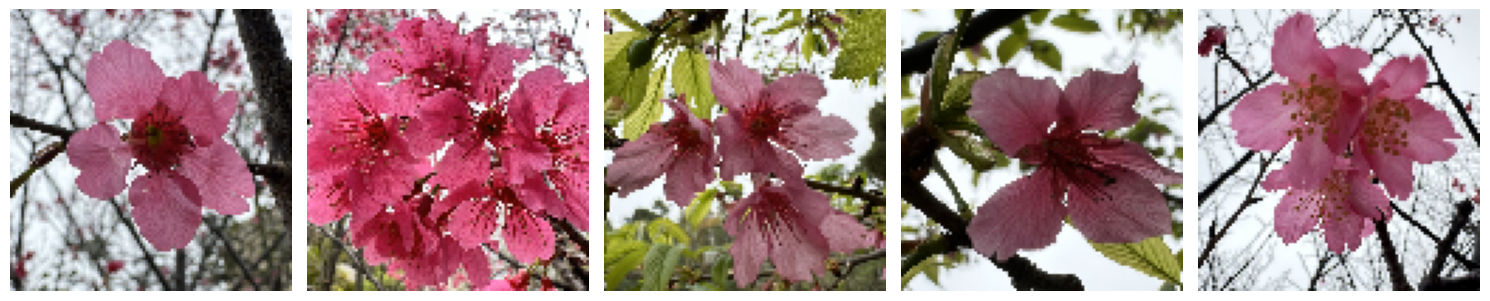

In [80]:
cleaned_dataset = data_cleaning(image_dataset)
# cleaned_dataset
# view_result = np.hstack(cleaned_dataset)
# cv2.imshow("Cleaned Dataset", view_result)
plt.figure(figsize=(15, 9))
counter = 0

for image in cleaned_dataset:
  plt.subplot(1, 5, counter+1)
  plt.imshow(image)
  plt.axis('off')
  counter +=1

plt.tight_layout()
plt.show()

> It is evident here that the returned images satisfy the two conditions specified above. Specifically, the cleaned image dataset contains pink flowers, and all of them were taken during the daytime.

## Guide Questions 2

1. **What mathematical or statistical bases have you considered in developing your function?**
> In developing the function for data cleaning, I considered some straightforward mathematical and statistical principles to identify and remove unwanted images from the dataset. For the *`is_nighttime function`*, I utilized the concept of *`mean intensity`* to gauge the brightness of each image. This mean intensity value acts as a quantitative measure of brightness, which is essential for distinguishing between images taken during the day and those captured at night. Specifically, the function calculates the mean intensity of an image in the RGB color space. The mean intensity is computed as the average value of all the pixels across all three RGB channels, which is a fundamental statistical measure of the image’s brightness. Using the RGB color space is sufficient in this case because the luminance of an image—which is indicative of its brightness and thus whether it’s likely to be a nighttime image—can be approximated by the intensity values in the RGB channels.
>
> However, in refining the *`is_nighttime function`*, I experimented with incorporating luminance by `employing a weighted sum of the RGB channels`, implemented in the *`is_nighttime_lum function`*. This method accounts for the varying contributions of each color channel to an image’s perceived brightness, similar to the process of converting an image to grayscale. The weights—more for green, followed by red, and then blue—reflect the human eye’s sensitivity to these colors. While direct grayscale conversion is simpler, I highly prefer this weighted approach as it allows for a detailed examination of how luminance is computed, offering a more comprehensive perspective on the mechanics of image processing.  Moreover, the *`choice of a threshold value of 60`* to classify an image as nighttime is based on empirical observation of the dataset. This threshold effectively differentiates between the lower luminance levels typically observed in nighttime images and the higher luminance levels of daytime images. For instance, the printed results show that images with mean intensities of `55.97` and `52.626` are likely nighttime images, as they fall below the threshold.
>
>
> Similarly, for the *`is_pink_flower function`*, I employed the `HSV color` space to capture color information more accurately. For this task, the HSV (Hue, Saturation, Value) color model is theoretically advantageous for color detection tasks because it decouples the color information (hue and saturation) from the luminance (value), making it more adaptive to changes in lighting conditions compared to the RGB model. By defining lower and upper bounds for the pink color in the HSV color space, I established a range of colors that typically correspond to pink flowers. Subsequently, I applied thresholding techniques as well as a masking process to the image, extracting regions that fall within this defined color range. The `threshold value of 1000` for the pink pixel count was also chosen based on empirical observations of the dataset. Images with a pink pixel count exceeding 1000 were consistently identified as containing pink flowers, as indicated by the printed results.



2. **What are the challenges in re-orienting the images in this action item?**
>The primary challenge in re-orienting images for this specific task are the following:
>* **Variability in Lighting Conditions:** The brightness and color of images can vary significantly due to factors such as the time of day, weather conditions within the location, and camera settings. This variability makes it challenging to establish a universal threshold for identifying nighttime images, as the degree of brightness can differ from one night scene to another.
>
> * **Subjectivity in Color Perception:** Defining the exact range for “pink” is subjective in this case, as color perception can vary among individuals and is influenced by lighting conditions within the environment. This subjectivity complicates the task of setting a precise range for pink flower detection, as the hue may appear differently under various lighting scenarios.
>
> * **Complexity of Image Content:** Images may contain a mix of subjects and backgrounds, making it difficult to isolate the target object (e.g., pink flowers) from the rest of the image. Additionally, the presence of multiple objects, varying color shades, and background clutter can complicate the segmentation and identification process.
>
> * **Image Quality and Resolution:** Variations in image quality and resolution can affect the detection of features within an image. Low-quality or low-resolution images may not provide enough detail for accurate classification, leading to potential misclassification.

3. What can you suggest for automating such a task?
> To automate the task of image classification effectively, `implementing machine learning algorithms` is a practical approach. Specifically, training either a convolutional neural network (CNN), Support Vector Machine (SVM), or Random Forests model on a dataset with labeled images for day/night and presence/absence of pink flowers can significantly improve the accuracy of classifications. In this case, the model would learn to discern more reliable and comprehensive visual features that are indicative of each category.
>
> In addition, `adaptive thresholding techniques` could also be employed to dynamically adjust threshold values based on the specific characteristics of each image, rather than relying on a fixed global threshold which was implemented in the current pipeline. This method can be particularly effective in dealing with the variability of images, enhancing the detection of nighttime scenes and pink flowers.
>
> Moreover, `fine-tuning the parameters`, such as threshold values and color ranges, is another simpler yet effective alternative. By empirically testing different values, one can assess their impact on classification accuracy and adjust them to optimize the performance for the given dataset. This might be more effective once the number of original images within the dataset exponentially increases, up to the point that manual observation of values are not practically attainable.
>
> Lastly, assembling a `pipeline that encompasses pre-processing, feature extraction, model inference, and post-processing` can streamline the entire process. This structured approach ensures that each step is efficiently executed, leading to a cleaner and more effective processing of images. By focusing on these strategies, the task of automating image classification can be executed with greater precision and reliability. The assembly of such a pipeline will also enhance the standardization technique for this task, mitigating the potential effects of irregularities within the dataset—ensuring a more consistent and reliable output.

# Data Enhancement

**From the cleaned dataset, develop and apply a function that:**

**1. Adjusts the exposure of the images based on the brightest image.** (Hint: You may manually select the representative image and apply Gamma Correction)

In [81]:
def select_brightest_image(images):
    # This function selects the brightest image based on the sum of pixel values in the V channel (Value of HSV)
    max_brightness = 0
    brightest_image = None
    counter = 0
    for image in images:
        hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        mean_brightness = np.mean(hsv_image[:, :, 2])
        if mean_brightness > max_brightness:
            max_brightness = mean_brightness
            brightest_image = image
            index = counter
        counter += 1
    print(f"\nBRIGHTEST IMAGE: image {index+1}")
    return brightest_image, index

def find_best_gamma(reference_image, target_image):
    # This function finds the best gamma value to match the brightness of the target image to the reference image
    # For simplicity, we're using a fixed range of gamma values to test
    best_gamma = 1.0
    min_loss = float('inf')

    ref_hsv_image = cv2.cvtColor(reference_image, cv2.COLOR_RGB2HSV)
    ref_mean_brightness = np.mean(ref_hsv_image[:, :, 2])

    for gamma in np.arange(0.1, 3.0, 0.001):
        adjusted_image = adjust_gamma(target_image, gamma)
        adj_hsv_image = cv2.cvtColor(adjusted_image, cv2.COLOR_RGB2HSV)
        adj_mean_brightness = np.mean(adj_hsv_image[:, :, 2])
        loss = np.sum(np.abs(ref_mean_brightness - adj_mean_brightness))
        if loss < min_loss:
            min_loss = loss
            best_gamma = gamma
    print(f"BEST GAMMA = {best_gamma}, Loss = {min_loss}")
    return best_gamma

# Function to adjust gamma correction of the image based on the calculated gamma factor
def adjust_gamma(image, gamma):

    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
      lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    adjusted_image = cv2.LUT(image, lookUpTable)

    return adjusted_image

def adjust_exposure(images):
    # This is the main function that applies gamma correction to all images based on the brightest image
    brightest_image, index_of_brightest_image = select_brightest_image(images)
    corrected_images = []
    for image in images:
        hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        mean_brightness = np.mean(hsv_image[:, :, 2])
        print(f"\nORIG MEAN BRIGHTNESS: {mean_brightness}")
        best_gamma = find_best_gamma(brightest_image, image)
        corrected_image = adjust_gamma(image, best_gamma)
        hsv_image = cv2.cvtColor(corrected_image, cv2.COLOR_RGB2HSV)
        mean_brightness = np.mean(hsv_image[:, :, 2])
        print(f"NEW MEAN BRIGHTNESS: {mean_brightness}")
        corrected_images.append(corrected_image)
    return corrected_images, index_of_brightest_image

> In the first data enhancement process, I adopted an `iterative approach` using to fine-tune the gamma correction for each image. This method is similar to using a smaller learning rate in optimization algorithms, where smaller steps are taken towards the minimum of a loss function. Here, the `“loss function”` is the *`difference in mean brightness between the target image and the brightest image in the dataset`*.
>
> By using a `gamma increment of 0.001`, the function will search for the most optimal gamma value that brings the target image’s brightness closer to that of the brightest image. This much granular approach allows for a precise adjustment, ensuring that the exposure level of each image is finely matched to the reference image without overshooting the desired brightness level.
>
> This careful calibration approach for the gamma value is the crucial part of the task because gamma correction is a non-linear operation; even small changes in the gamma value can lead to significant alterations in the image’s brightness.




BRIGHTEST IMAGE: image 2

ORIG MEAN BRIGHTNESS: 154.625
BEST GAMMA = 0.6390000000000005, Loss = 0.04810000000000514
NEW MEAN BRIGHTNESS: 179.3555

ORIG MEAN BRIGHTNESS: 179.3074
BEST GAMMA = 0.9900000000000008, Loss = 0.0
NEW MEAN BRIGHTNESS: 179.3074

ORIG MEAN BRIGHTNESS: 144.9354
BEST GAMMA = 0.5780000000000004, Loss = 0.020800000000008367
NEW MEAN BRIGHTNESS: 179.3282

ORIG MEAN BRIGHTNESS: 136.6585
BEST GAMMA = 0.4680000000000003, Loss = 0.035799999999994725
NEW MEAN BRIGHTNESS: 179.2716

ORIG MEAN BRIGHTNESS: 177.0265
BEST GAMMA = 0.9440000000000007, Loss = 0.0004000000000132786
NEW MEAN BRIGHTNESS: 179.307


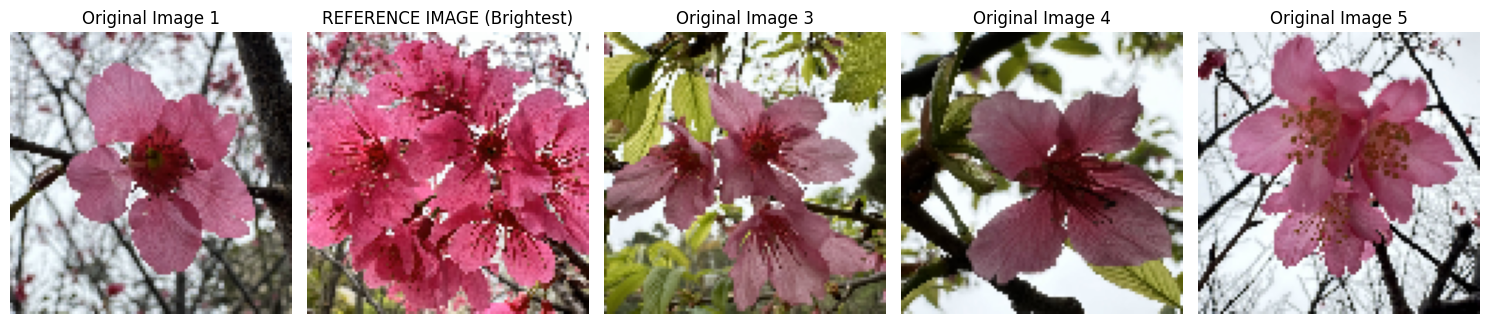

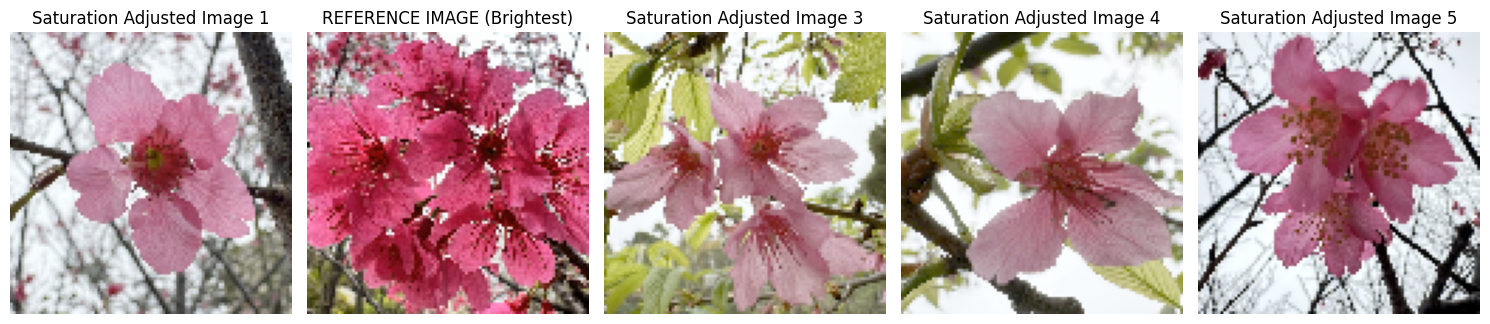

In [82]:
# call the adjust_exposure() function and for each image included in the cleaned image dataset

exposure_adjusted_image_dataset, brightest_index = adjust_exposure(cleaned_dataset)

plt.figure(figsize=(15, 9))
counter = 0

# ORIGINAL IMAGES
for image in cleaned_dataset:
  plt.subplot(1, 5, counter+1)
  plt.imshow(image)
  plt.axis('off')
  if counter == brightest_index:
    plt.title('REFERENCE IMAGE (Brightest)')
  else:
    plt.title(f"Original Image {counter+1}")
  counter +=1

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 9))
counter = 0
# SATURATION ADJUSTED IMAGES
for image in exposure_adjusted_image_dataset:
  plt.subplot(1, 5, counter+1)
  plt.imshow(image)
  plt.axis('off')
  if counter == brightest_index:
    plt.title('REFERENCE IMAGE (Brightest)')
  else:
    plt.title(f"Saturation Adjusted Image {counter+1}")
  counter +=1

plt.tight_layout()
plt.show()

> The `gamma values` indicate the degree of adjustment needed for each image to achieve a consistent exposure level across the dataset. The `second image`, being the brightest, served as the benchmark for the rest. In this context, the small gamma values for the other images show that only minor adjustments were needed, demonstrating the effectiveness of the selection process for the representative image and the precision of the gamma correction method. Meanwhile, the minimal losses across all images confirm the accuracy of this approach in standardizing the exposure of the dataset.

Based on the resulting values printed above, as well as the adjusted images, we can now derive the following insights:
>
* **Image 1**
> had an original mean brightness of `154.625`. To match the brightness of the brightest image, a gamma value of `0.639` was found to be the best, resulting in a new mean brightness of `179.3555`. The slight loss indicates that the image’s brightness was increased effectively, but with a minimal deviation from the target brightness.
>
* **Image 2**
> is the `brightest image in the cleaned dataset`, serving as the reference for adjustments. It required a negligible gamma correction (gamma value of 0.990), which is reflected in the zero loss. The original and new mean brightness remain the same at `179.3074`, confirming that this image did not need any adjustment.
>
* **Image 3**
> started with a lower original mean brightness of `144.9354`. A gamma value of `0.578` brought its brightness level up to `179.3282`, closely matching the reference image with a very small loss.
>
* **Image 4**
> had a more significant difference in brightness, with an original mean brightness of `136.6585`. A gamma value of `0.468` was necessary to increase its brightness to `179.2716`, aligning it with the reference image’s brightness with a small loss as well.
>
* **Image 5**
> had an original mean brightness of `177.0265`, which was already close to the reference. A gamma value of `0.944` was sufficient to make a minor adjustment, resulting in a new mean brightness of `179.307` and an almost negligible loss.

**2. Adjusts the saturation of the images to match the saturation of the most saturated image. (Hint: You may manually select the representative image and apply Histogram Equalization and Channel Arithmetic)**

In [84]:
def select_most_saturated_image(images):
    # This function selects the most saturated image based on the mean of pixel values in the S channel
    max_mean_saturation = 0
    most_saturated_image = None
    counter = 0
    for image in images:
        hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        mean_saturation = np.mean(hsv_image[:, :, 1])
        if mean_saturation > max_mean_saturation:
            max_mean_saturation = mean_saturation
            most_saturated_image = image
            index = counter
        counter += 1
    return most_saturated_image, index

def histogram_equalization(image):
    # This function applies histogram equalization to the saturation channel
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    hsv_image[:, :, 1] = cv2.equalizeHist(hsv_image[:, :, 1])

    # orig_h, orig_s, orig_v = cv2.split(hsv_image)
    # equalized_s = cv2.equalizeHist(orig_s)
    # # Merge the equalized saturation channel with the original image before passing the image as parameter for adjustment
    # hsv_image = cv2.merge((hsv_image[:,:,0], equalized_s, hsv_image[:,:,2]))
    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

def match_saturation(target_image, reference_image):
    # This function adjusts the saturation of an image to match the saturation of the most saturated image
    target_hsv = cv2.cvtColor(target_image, cv2.COLOR_RGB2HSV)
    reference_hsv = cv2.cvtColor(reference_image, cv2.COLOR_RGB2HSV)

    # Perform channel arithmetic - scale the saturation channel
    scale_factor = np.mean(reference_hsv[:, :, 1]) / np.mean(target_hsv[:, :, 1])
    target_hsv[:, :, 1] = cv2.multiply(target_hsv[:, :, 1], scale_factor)

    # Clip the values to the maximum of 255 to avoid overflow
    target_hsv[:, :, 1] = np.clip(target_hsv[:, :, 1], 0, 255).astype(np.uint8)

    return cv2.cvtColor(target_hsv, cv2.COLOR_HSV2RGB)

def adjust_saturation(images):
    # This is the main function that adjusts the saturation of all images based on the most saturated image
    most_saturated_image, most_saturated_index = select_most_saturated_image(images)
    # Apply histogram equalization to the most saturated image
    # most_saturated_image = histogram_equalization(most_saturated_image)
    corrected_images = []
    for image in images:
        if image is most_saturated_image:
        #  Skip the most saturated image as it's the reference, just add it
          corrected_images.append(image)
          orig_hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
          mean_saturation = np.mean(orig_hsv_image[:, :, 1])
          print(f"\nORIG MEAN SATURATION OF REFERENCE IMAGE: {mean_saturation}")
        else:
          #Apply histogram equalization to the target image
          orig_hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
          mean_saturation = np.mean(orig_hsv_image[:, :, 1])
          print(f"\nORIG MEAN SATURATION: {mean_saturation}")

          # Apply histogram equalization to the current image's saturation channel
          image = histogram_equalization(image)

          # For checking purposes only
          equalized_hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
          equalized_image_mean_saturation = np.mean(equalized_hsv_image[:, :, 1])
          print(f"EQUALIZED IMAGE MEAN SATURATION: {equalized_image_mean_saturation}")

          corrected_image = match_saturation(image, most_saturated_image)
          corrected_images.append(corrected_image)
          corrected_hsv_image = cv2.cvtColor(corrected_image, cv2.COLOR_RGB2HSV)
          corrected_image_mean_saturation = np.mean(corrected_hsv_image[:, :, 1])
          print(f"NEW MEAN SATURATION After Correction: {corrected_image_mean_saturation}")
    return corrected_images, most_saturated_index

> In this part, the code that I have implemented is designed to adjust the saturation levels across a collection of images, ensuring they all have a consistent appearance. It begins by `identifying the image with the highest average saturation`, which serves as the reference for the rest of the images. This is achieved through the *`select_most_saturated_image`* function, which calculates the mean saturation for each image after converting it to the HSV color space.
>
>Once the reference image is determined, the *`adjust_saturation`* function takes over. It applies histogram equalization to the saturation channel of each image, enhancing their contrast and making them more visually striking. For images other than the reference, the *`match_saturation`* function adjusts their saturation levels to match that of the most saturated image. This involves `scaling the saturation channel` based on a factor derived from `comparing the mean saturation values of the target and reference images`. The scaled values are then clipped to ensure they remain within the valid range for pixel values.
>
>The result is a set of images with approximately uniform saturation levels, where the most saturated image retains its original saturation, and all other images are adjusted to match it.


ORIG MEAN SATURATION: 42.697
EQUALIZED IMAGE MEAN SATURATION: 130.1431
NEW MEAN SATURATION After Correction: 139.462

ORIG MEAN SATURATION OF REFERENCE IMAGE: 139.4427

ORIG MEAN SATURATION: 78.3905
EQUALIZED IMAGE MEAN SATURATION: 129.1513
NEW MEAN SATURATION After Correction: 139.1315

ORIG MEAN SATURATION: 61.9268
EQUALIZED IMAGE MEAN SATURATION: 130.4896
NEW MEAN SATURATION After Correction: 139.2829

ORIG MEAN SATURATION: 62.9407
EQUALIZED IMAGE MEAN SATURATION: 130.9115
NEW MEAN SATURATION After Correction: 139.5297


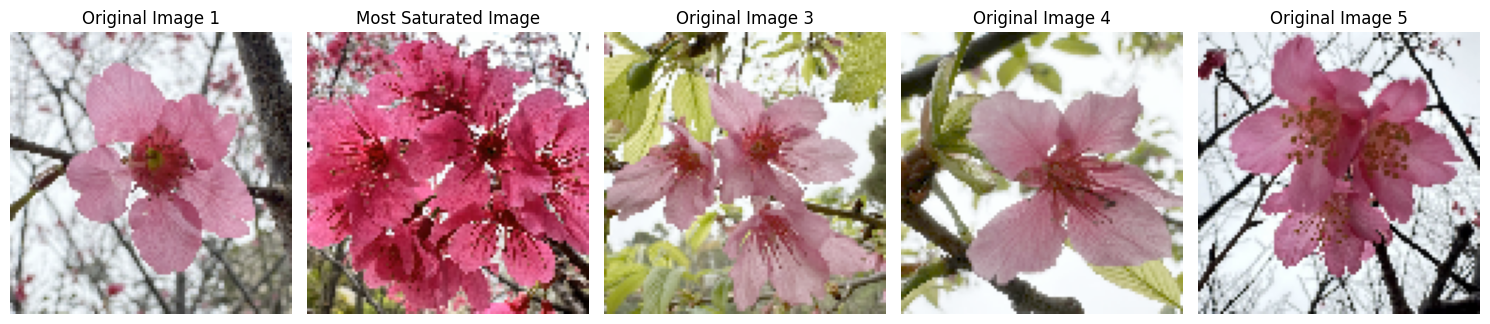

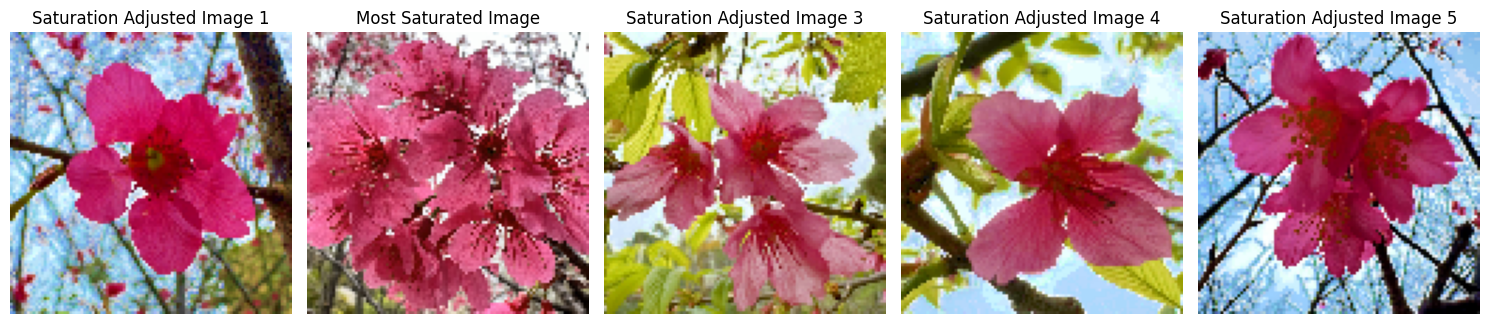

In [85]:
# call the adjust_exposure() function and for each image included in the cleaned image dataset that underwent exposure adjustment
# saturation_adjusted_image_dataset, most_saturated_index = adjust_saturation(cleaned_dataset)
saturation_adjusted_image_dataset, most_saturated_index = adjust_saturation(exposure_adjusted_image_dataset)

plt.figure(figsize=(15, 9))
counter = 0

# ORIGINAL IMAGES
# for image in cleaned_dataset:
for image in exposure_adjusted_image_dataset:
  plt.subplot(1, 5, counter+1)
  plt.imshow(image)
  plt.axis('off')
  if counter == most_saturated_index:
    plt.title(f"Most Saturated Image")
  else:
    plt.title(f"Original Image {counter+1}")
  counter +=1

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 9))
counter = 0
# SATURATION ADJUSTED IMAGES
for image in saturation_adjusted_image_dataset:
  plt.subplot(1, 5, counter+1)
  plt.imshow(image)
  plt.axis('off')
  if counter == most_saturated_index:
    plt.title(f"Most Saturated Image")
  else:
    plt.title(f"Saturation Adjusted Image {counter+1}")
  counter +=1

plt.tight_layout()
plt.show()

> Initially, the images had varying mean saturation levels, with Image 1 starting at the lowest value of `42.697` and Image 2, the reference image, having the highest original mean saturation of `139.4427`. After applying histogram equalization, we observe from the resulting values and images above a significant increase in the mean saturation values for Images 1, 3, 4, and 5, `indicating that the contrast within the saturation channel has been effectively enhanced`.
>
> The images utilized in this case are the ones that undergo exposure adjustment as the first step of enhancement. This subsequent correction step aimed to align the saturation levels of all images with that of the reference image. Moreover, it can also be deduced from the results that the new mean saturation values after correction for Images 1, 3, 4, and 5 are very close to that of the reference image, with all corrected images achieving mean saturation values within the range of `139.1315` to `139.5297`. This consistency suggests that the adjustment process has effectively standardized the saturation levels across the set, bringing them in line with the most saturated image, which was used as the benchmark.
>
>Overall, the process has not only homogenized the saturation levels but also likely improved the visual quality of the images by enhancing their vibrancy and color intensity. This uniformity in saturation is particularly beneficial when the images are part of a series or collection where a coherent visual style is desired.

# Modified Data Augmentation

Reuse the data augmentation functions from MP2 on geometric transformations and add the following augmentation techniques:

* Increase or decrease the saturation.
* Increase or decrease image exposure.
* Add average or Gaussian blurs of different intensities.
* Adjusts the sharpness of an image (use your filter)

In [92]:
import cv2
import numpy as np
import random

# Define Augmentation Functions

# Function to adjust saturation of the image
def adjust_saturation(image, saturation_factor):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Function to adjust gamma correction of the image based on the calculated gamma factor
def adjust_exposure(image, gamma):

    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
      lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    adjusted_image = cv2.LUT(image, lookUpTable)

    return adjusted_image

# Function to implement either average or gaussian blur with varying kernel size
def apply_blur(image, blur_type='average', kernel_size=(3, 3)):
    if blur_type == 'average':
        return cv2.blur(image, kernel_size)
    elif blur_type == 'gaussian':
        return cv2.GaussianBlur(image, kernel_size, 0)

# Function to adjust the sharpness of an image with varying sharpening factor
def adjust_sharpness(image, sharpening_factor):
    kernel = np.array([[-1, -1, -1],
                       [-1, 9 + sharpening_factor, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

# Function that creates the Augmentation Pipeline

def augment_image(image, save_path=None):

    # Save the original image as part of the augmented dataset
    augmented_images = [image.copy()]

    # Randomly apply augmentation techniques
    # if random.choice([True, False]):

    # Saturation Technique with random saturation factor
    saturation_factor = random.uniform(0.5, 2.0)
    augmented_image = adjust_saturation(image.copy(), saturation_factor)
    augmented_images.append(augmented_image)

    # Exposure Technique with random exposure factor
    exposure_factor = random.uniform(0.5, 2.0)
    augmented_image = adjust_exposure(image.copy(), exposure_factor)
    augmented_images.append(augmented_image)

    # Two types of blurring (average or gaussian) with varying kernel size
    blur_type = random.choice(['average', 'gaussian'])
    kernel_size = random.choice([(3, 3), (5, 5), (7, 7), (9,9), (11,11)])
    augmented_image = apply_blur(image.copy(), blur_type, kernel_size)
    augmented_images.append(augmented_image)

    # Sharpening Technique using laplacian filter with random sharpening factor
    sharpening_factor = random.uniform(-1, 1)
    augmented_image = adjust_sharpness(image.copy(), sharpening_factor)
    augmented_images.append(augmented_image)

    return augmented_images

The code above us a comprehensive image augmentation pipeline that applies various transformations to enhance or alter the properties of an image. Here’s an explanation of each function and the overall augmentation process:

**1. adjust_saturation(image, saturation_factor):**
> This function modifies the saturation of an image. It converts the image from RGB to HSV color space, scales the saturation channel (S channel) by the saturation_factor, and ensures the values stay within the valid range using np.clip. The image is then converted back to RGB color space.

**2. adjust_exposure(image, gamma):**
>This function adjusts the exposure of an image using gamma correction. A lookup table is created to map the original pixel values to their new values based on the gamma factor. The cv2.LUT function applies this mapping to the image, effectively adjusting its exposure.

**3. apply_blur(image, blur_type, kernel_size):**
> This function applies either an average or Gaussian blur to the image. The blur_type parameter determines the type of blur, and kernel_size specifies the size of the kernel used for blurring. Larger kernels produce a more pronounced blur effect.
**4. adjust_sharpness(image, sharpening_factor):**
> This function sharpens the image by applying a convolution with a custom kernel. The kernel is designed to enhance edges and details in the image. The sharpening_factor adjusts the intensity of the sharpening effect.

**5. augment_image(image, save_path):**
>This is the main function that orchestrates the augmentation process. It begins by saving a copy of the original image. Then, it randomly applies the aforementioned augmentation techniques—saturation adjustment, exposure adjustment, blurring, and sharpening—to the image. Each augmented image is added to a list, which is returned at the end of the function.

Lastly, the randomization in the `augment_image` function ensures that each image undergoes a unique set of transformations, which can be beneficial for training machine learning models by providing a diverse dataset.

**Sanity Check**
> Checking if the functions that implement the augmentation techniques are functioning as expected.

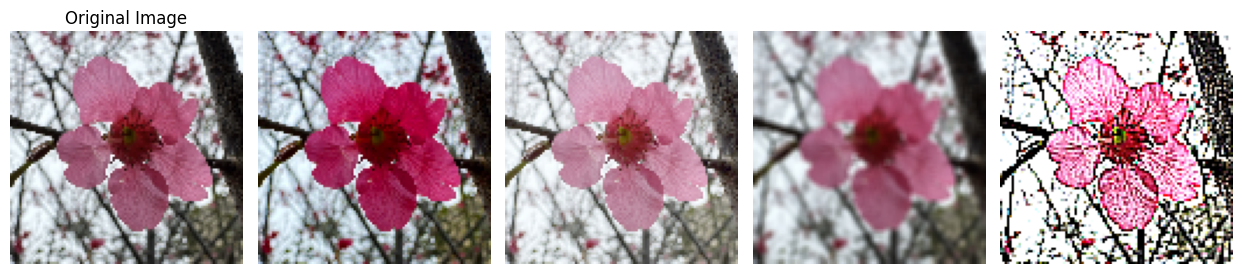

In [93]:
sample_results = augment_image(cleaned_dataset[0])

plt.figure(figsize=(15, 9))
counter = 0

for image in sample_results:
  plt.subplot(1, 6, counter+1)
  plt.imshow(image)
  plt.axis('off')
  if counter == 0:
    plt.title(f"Original Image")
  counter +=1

plt.tight_layout()
plt.show()

Lastly, we now reuse the augmentation (Geometric Transformation) functions that were used in MP 2.

In [ ]:
def apply_black_patch(image, patch_size=(30, 30), patch_position=None):
    """
    Description:
        Apply a black patch over a portion of the image.

    Parameters:
        image (numpy.ndarray): Input image.
        patch_size (tuple): Size of the black patch in pixels. Default is (30, 30).
        patch_position (tuple): Position of the top-left corner of the black patch
                                in the form of (x, y). If None, it will be randomly placed.

    Returns:
        numpy.ndarray: Image with the black patch applied.
    """
    if patch_position is None:
        # Randomly choose the position of the black patch
        patch_x = np.random.randint(0, image.shape[1] - patch_size[1])
        patch_y = np.random.randint(0, image.shape[0] - patch_size[0])
    else:
        patch_x, patch_y = patch_position

    patched_image = image.copy()
    patched_image[patch_y:patch_y + patch_size[0], patch_x:patch_x + patch_size[1], :] = 0
    return patched_image


def shift_image(image, shift_x=0, shift_y=0):
    """
    Description:
        Shifts an image sideward or upwards.

    Parameters:
        image (numpy.ndarray): Input image.
        shift_x (int): Shift distance along the x-axis. Positive values shift right,
                       negative values shift left. Default is 0.
        shift_y (int): Shift distance along the y-axis. Positive values shift downwards,
                       negative values shift upwards. Default is 0.

    Returns:
        numpy.ndarray: Shifted image.
    """
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    shifted_image = cv2.warpAffine(image, M, (cols, rows))
    return shifted_image

def rotate_image(image, angle):
    """
    Definition:
        Rotates an image given a specific angle.

    Parameters:
        image (numpy.ndarray): Input image.
        angle (float): Rotation angle in degrees. Positive values rotate clockwise,
                       negative values rotate counterclockwise.

    Returns:
        numpy.ndarray: Rotated image.
    """
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

def flip_image(image, direction='horizontal'):
    """
    Definition:
        Flips an image either vertically or horizontally.

    Parameters:
        image (numpy.ndarray): Input image.
        direction (str): Direction of flipping. 'horizontal' for horizontal flipping,
                         'vertical' for vertical flipping. Default is 'horizontal'.

    Returns:
        numpy.ndarray: Flipped image.
    """
    if direction == 'horizontal':
        flipped_image = cv2.flip(image, 1)
    elif direction == 'vertical':
        flipped_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid direction. Choose 'horizontal' or 'vertical only'.")
    return flipped_image

Finally, we can now produce more augmented images using all of these techniques. But first, we need to combine it for a cleaner augmentation pipeline.

In [ ]:
# Function to generate augmented images with random parameters
def modified_augment_image(image):

    # Save the original image as part of the augmented dataset
    augmented_images = [image.copy()]

    # Saturation Technique with random saturation factor
    saturation_factor = random.uniform(0.5, 1.5)
    augmented_image = adjust_saturation(image.copy(), saturation_factor)
    augmented_images.append(augmented_image)

    # Exposure Technique with random exposure factor
    exposure_factor = random.uniform(0.5, 1.5)
    augmented_image = adjust_exposure(image.copy(), exposure_factor)
    augmented_images.append(augmented_image)

    # Two types of blurring (average or gaussian) with varying kernel size
    blur_type = random.choice(['average', 'gaussian'])
    kernel_size = random.choice([(3, 3), (5, 5), (7, 7), (9,9), (11,11)])
    augmented_image = apply_blur(image.copy(), blur_type, kernel_size)
    augmented_images.append(augmented_image)

    # Sharpening Technique using laplacian filter with random sharpening factor
    sharpening_factor = random.uniform(-1, 1)
    augmented_image = adjust_sharpness(image.copy(), sharpening_factor)
    augmented_images.append(augmented_image)


    # For Black patch
    patch_sizeX = np.random.randint(10, 50)  # Random patch size between 10 and 50
    patch_sizeY = np.random.randint(10, 50)  # Random patch size between 10 and 50
    patch_position = (np.random.randint(0, image.shape[1] - patch_sizeX),
                      np.random.randint(0, image.shape[0] - patch_sizeY))
    augmented_image = apply_black_patch(image, patch_size=(patch_sizeX, patch_sizeY), patch_position=patch_position)
    augmented_images.append(augmented_image)

    # Shifting image
    shift_x = np.random.randint(-50, 50)  # Random shift between -50 and 50 pixels
    shift_y = np.random.randint(-50, 50)
    augmented_image = shift_image(image, shift_x=shift_x, shift_y=shift_y)
    augmented_images.append(augmented_image)

    # Rotating image
    angle = np.random.randint(-180, 180)  # Random angle between -45 and 45 degrees
    augmented_image = rotate_image(image, angle=angle)
    augmented_images.append(augmented_image)

    # Flipping Image
    flip_direction = np.random.choice(['horizontal', 'vertical'])
    augmented_image = flip_image(image, direction=flip_direction)
    augmented_images.append(augmented_image)

    return augmented_images

As you can see below the function to simplify the augmentation for all our images in the dataset.

In [ ]:
# This function generates augmented dataset
def generate_augmented_dataset(original_dataset, num_augmented_images):
    augmented_dataset = []
    for original_image in original_dataset:
        for _ in range(num_augmented_images):
            augmented_image = modified_augment_image(original_image)
            augmented_dataset.extend(augmented_image)
    return augmented_dataset

Then to wrap it up, we can now call the modified augmentation function and save these images to the drive.

In [ ]:
images_generated = 0
aug_per_image = 20
image_count = 10
# Generate augmented images for all images in the dataset
augmented_images = generate_augmented_dataset(image_dataset, aug_per_image)

# Save augmented images
images_generated = 0
for augmented_image in augmented_images:
    output_filename = os.path.join(AUGMENTED_OUTPUT_DIRECTORY, f"augmented_{images_generated}.jpg")
    # Save the image, assuming it's in the correct format (e.g., a NumPy array)
    cv2.imwrite(output_filename, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
    images_generated += 1

print(f"\nTOTAL NUMBER OF AUGMENTED IMAGES PRODUCED = {images_generated}")
print(f"Shape {len(augmented_images)}")


TOTAL NUMBER OF AUGMENTED IMAGES PRODUCED = 1800
Shape 1800


```
---------------End of Machine Project 3--------------------
```